In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

## 数据集导入

In [2]:
# df = pd.read_excel('.xlsx')
df = pd.read_csv('df_wenben.csv')
#首先导入总表，之后都基于总表提取分表
#X表示所有自变量二维表，y表示因变量
#表格中处理y放到x自变量前面
feat_labels = df.columns

In [3]:
df = df.iloc[:1000,3:]

In [ ]:
X = df.iloc[:,3:]
y = df.iloc[:,-1]

In [5]:
y

0       5
1       6
2       5
3       6
4       5
       ..
995     6
996    13
997     5
998     6
999     6
Name: weaptype1, Length: 1000, dtype: int64

## 数据预处理
### 数据描述

In [5]:
# 将‘特殊’缺失值用NaN代替
df01 = df
df01 = df01.replace(-99,np.NaN)
df01 = df01.replace(-9,np.NaN)

In [5]:
# 缺失值补充为中位数
df.fillna(df.median(),inplace = True)
df

,eventid,eventid.1,iyear,imonth,iday,country,region,extended,latitude,longitude,...,nkill,nkillus,nkillter,nwound,nwoundus,property,ishostkid,INT_MISC,nwoundte,weaptype1
0,2.020000e+11,0,2013.0,1,1,34.0,11,0.0,-3.375828,29.364107,...,1.0,0.0,0.0,6.0,0.0,0,0.0,0.0,0.0,5.0
1,2.020000e+11,1,2013.0,1,1,167.0,9,0.0,55.751377,37.579914,...,0.0,0.0,0.0,3.0,0.0,0,0.0,0.0,0.0,6.0
2,2.020000e+11,2,2013.0,1,1,95.0,8,0.0,54.607712,-5.956210,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,5.0
3,2.020000e+11,3,2013.0,1,2,95.0,10,0.0,33.303566,44.371773,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,6.0
4,2.020000e+11,4,2013.0,1,2,155.0,10,0.0,31.995965,35.271110,...,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114178,2.020000e+11,114178,2017.0,12,31,182.0,11,0.0,2.359673,45.385034,...,1.0,0.0,0.0,2.0,0.0,0,0.0,0.0,0.0,5.0
114179,2.020000e+11,114179,2017.0,12,31,200.0,10,0.0,35.407278,35.942679,...,2.0,0.0,0.0,7.0,0.0,1,0.0,0.0,0.0,6.0
114180,2.020000e+11,114180,2017.0,12,31,160.0,5,0.0,6.900742,124.437908,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,8.0
114181,2.020000e+11,114181,2017.0,12,31,92.0,6,0.0,24.798346,93.940430,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,6.0


In [5]:
#显示存在缺失值的列数
temp = df
print(f'There are {temp.isnull().any().sum()} columns in train dataset with missing values.')
#返回缺失值占比
have_null_fea_dict = (temp.isnull().sum()/len(temp)).to_dict()
#print(have_null_fea_dict)
fea_null = {}
for key,value in have_null_fea_dict.items():
    if value > 0:
        fea_null[key] = value
print(fea_null)

There are 0 columns in train dataset with missing values.
{}


Text(0.5, 1.0, 'Empty data summary')

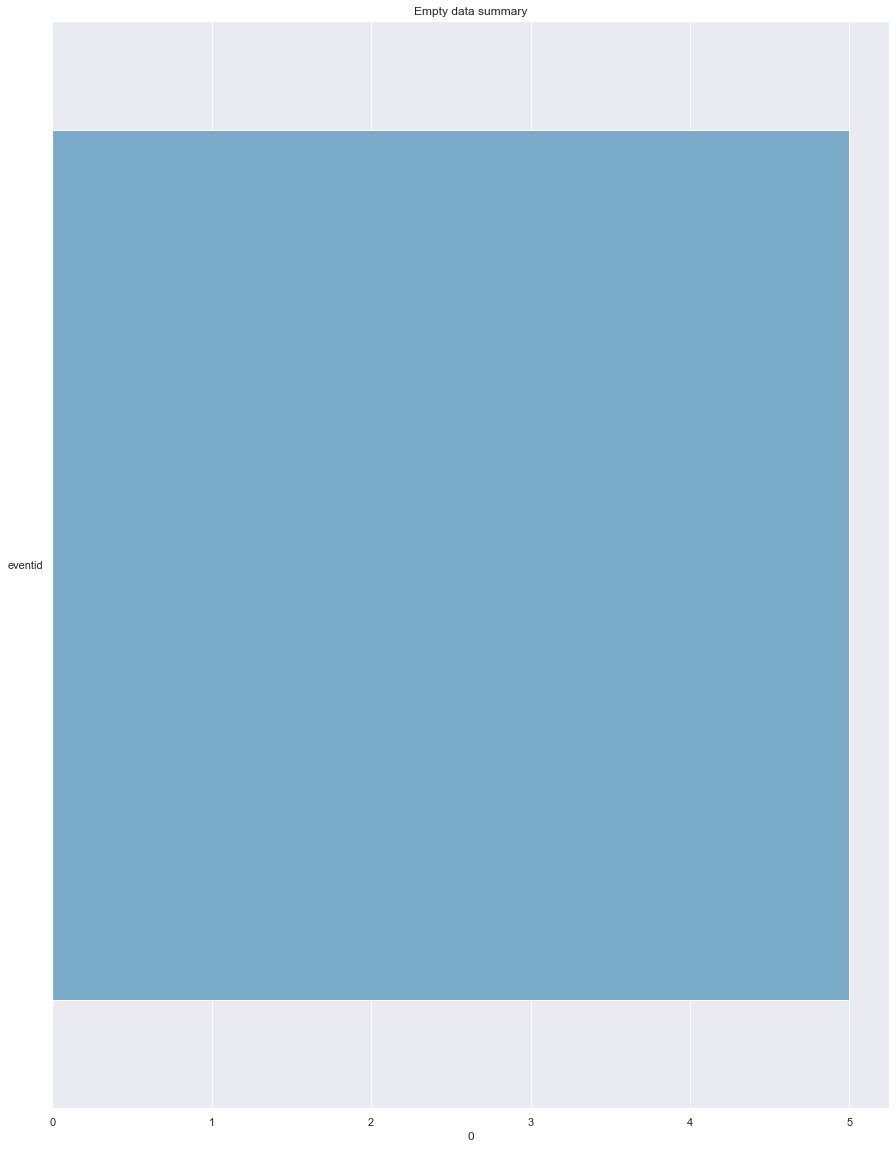

In [67]:
#可视化缺失值情况，当无缺失值时，代码无法跑动
df_isnull_sum=pd.DataFrame(data.isnull().sum())
df_isnull_sum=df_isnull_sum[df_isnull_sum[0]>0]
plt.figure(figsize=(15,20))
sns.set(style='darkgrid')
sns.barplot(y=df_isnull_sum.sort_values(0,ascending=False).index,x=df_isnull_sum.sort_values(0,ascending=False)[0],palette="Blues_r")
plt.title('Empty data summary')

In [8]:
df11 = df01
#删除缺失率大于70的特征
for key,value in have_null_fea_dict.items():
    if value > 0.3:
        df11 = df11.drop(key,axis=1)
df11

,eventid.1,iyear,imonth,iday,country,region,extended,latitude,longitude,specificity,...,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_MISC
0,0,1998,1,1,34,11,0,-3.375828,29.364107,1,...,5,104,0,100,6.0,0,0,0,0,0
1,1,1998,1,1,167,9,0,55.751377,37.579914,1,...,14,0,0,0,3.0,0,0,0,0,0
2,2,1998,1,1,603,8,0,54.607712,-5.956210,1,...,2,1,0,0,0.0,0,0,0,0,1
3,3,1998,1,2,95,10,0,33.303566,44.371773,1,...,11,0,0,0,0.0,0,0,1,0,1
4,4,1998,1,2,155,10,0,31.995965,35.271110,4,...,2,0,0,0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114178,114178,2017,12,31,182,11,0,2.359673,45.385034,2,...,5,1,0,0,2.0,0,0,0,0,0
114179,114179,2017,12,31,200,10,0,35.407278,35.942679,1,...,11,2,0,0,7.0,0,0,1,0,1
114180,114180,2017,12,31,160,5,0,6.900742,124.437908,2,...,18,0,0,0,0.0,0,0,1,0,0
114181,114181,2017,12,31,92,6,0,24.798346,93.940430,1,...,7,0,0,0,0.0,0,0,0,0,0


In [9]:
df02 = df11
#删除缺失率大于37的行
df02 = df02.dropna(thresh=37)
# df02[df02.iloc[:,1]>2014]
df02

,eventid.1,iyear,imonth,iday,country,region,extended,latitude,longitude,specificity,...,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_MISC
0,0,1998,1,1,34,11,0,-3.375828,29.364107,1,...,5,104,0,100,6.0,0,0,0,0,0
1,1,1998,1,1,167,9,0,55.751377,37.579914,1,...,14,0,0,0,3.0,0,0,0,0,0
2,2,1998,1,1,603,8,0,54.607712,-5.956210,1,...,2,1,0,0,0.0,0,0,0,0,1
3,3,1998,1,2,95,10,0,33.303566,44.371773,1,...,11,0,0,0,0.0,0,0,1,0,1
4,4,1998,1,2,155,10,0,31.995965,35.271110,4,...,2,0,0,0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114178,114178,2017,12,31,182,11,0,2.359673,45.385034,2,...,5,1,0,0,2.0,0,0,0,0,0
114179,114179,2017,12,31,200,10,0,35.407278,35.942679,1,...,11,2,0,0,7.0,0,0,1,0,1
114180,114180,2017,12,31,160,5,0,6.900742,124.437908,2,...,18,0,0,0,0.0,0,0,1,0,0
114181,114181,2017,12,31,92,6,0,24.798346,93.940430,1,...,7,0,0,0,0.0,0,0,0,0,0


### 缺失值处理
#### 异常值检测（箱线图待处理）
3segama异常值检验、EllipticEnvelope异常值检验、箱线图检验

In [4]:
#3segama异常值检验，并将其命名为空值
def find_outliers_by_3segama(data):
    feat_labels = data.iloc[:,:].columns    
    for fea in feat_labels:
        data_std = np.std(data[fea])
        data_mean = np.mean(data[fea])
        outliers_cut_off = data_std * 3
        lower_res = data_mean - outliers_cut_off
        upper_res = data_mean + outliers_cut_off
        print(lower_res)
        print(upper_res)
        count = 0
        for i in range(data.shape[0]):
            if  data.loc[i,fea] < lower_res or data.loc[i,fea] > upper_res:
                data.loc[i,fea] = np.nan
                count += 1
        print(f'特征-- {fea} --的异常值个数为:{count}')
    return data
tr = find_outliers_by_3segama(df)

201987427050.40427
202012537918.11118
特征-- eventid --的异常值个数为:2
-41794.37867652628
155976.37867652628
特征-- eventid.1 --的异常值个数为:0
1998.3618764224648
2025.576660837898
特征-- iyear --的异常值个数为:934
-3.680252307702016
16.61841297960589
特征-- imonth --的异常值个数为:0
-10.896862011537301
42.02964009584057
特征-- iday --的异常值个数为:0
-167.76461204823676
414.94005848071794
特征-- country --的异常值个数为:1639
0.91421741498114
15.134879210611112
特征-- region --的异常值个数为:0
-0.6557995435757717
0.7772712162415802
特征-- extended --的异常值个数为:6935
-13.642272578090015
66.70549139537154
特征-- latitude --的异常值个数为:699
-58.67378863445747
160.43698529898649
特征-- longitude --的异常值个数为:3385
-1.2910609440998582
4.209131059616178
特征-- specificity --的异常值个数为:928
-0.7613215804294278
0.9369869596890374
特征-- vicinity --的异常值个数为:10029
0.6810112600275572
1.2976370501412071
特征-- crit1 --的异常值个数为:1219
0.796713321069291
1.1944587448249315
特征-- crit2 --的异常值个数为:504
-0.1003187220654872
1.8579008490020716
特征-- crit3 --的异常值个数为:0
-0.9429585329775958
1.266509324251

In [11]:
tr

,eventid,eventid.1,iyear,imonth,iday,country,region,extended,latitude,longitude,...,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_MISC
0,2.020000e+11,0,NaN,1,1,34.0,11,0.0,-3.375828,29.364107,...,5.0,NaN,0.0,NaN,6.0,0.0,0.0,0,0.0,0.0
1,2.020000e+11,1,NaN,1,1,167.0,9,0.0,55.751377,37.579914,...,14.0,0.0,0.0,0.0,3.0,0.0,0.0,0,0.0,0.0
2,2.020000e+11,2,NaN,1,1,NaN,8,0.0,54.607712,-5.956210,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN
3,2.020000e+11,3,NaN,1,2,95.0,10,0.0,33.303566,44.371773,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN
4,NaN,4,NaN,1,2,155.0,10,0.0,31.995965,35.271110,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114178,NaN,114178,2017.0,12,31,182.0,11,0.0,2.359673,45.385034,...,5.0,1.0,0.0,0.0,2.0,0.0,0.0,0,0.0,0.0
114179,NaN,114179,2017.0,12,31,200.0,10,0.0,35.407278,35.942679,...,11.0,2.0,0.0,0.0,7.0,0.0,0.0,1,0.0,NaN
114180,NaN,114180,2017.0,12,31,160.0,5,0.0,6.900742,124.437908,...,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
114181,NaN,114181,2017.0,12,31,92.0,6,0.0,24.798346,93.940430,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [17]:
#箱线图异常值检测
def find_outliers_by_box(data,fea): 
    q1,q3 = data[fea].quantile([0.25,0.75])
    data_iqr = q3 - q1
    lower_res = q1 - data_iqr
    upper_res = q3 + data_iqr
    count = 0
    #0表示异常值，1表示正常值
#     data[fea+'_outliers'] = data[fea].apply(lambda x:str('0') if x > upper_res or x < lower_res else '1')
    for i in range(data.shape[0]):
        if  data.loc[i,fea] < lower_res or data.loc[i,fea] > upper_res:
            data.loc[i,fea] = np.nan
            count += 1
    print(f'特征-- {fea} --的异常值个数为:{count}')
    data[fea]
    return data
for fea in feat_labels:#用box-IQR准则遍历数值特征
    train_data2 = find_outliers_by_box(tr,fea)
    print('-'*30)
    train_data2

特征-- eventid --的异常值个数为:0
----------
特征-- eventid.1 --的异常值个数为:0
----------
特征-- iyear --的异常值个数为:8892
----------
特征-- imonth --的异常值个数为:0
----------
特征-- iday --的异常值个数为:0
----------
特征-- country --的异常值个数为:16743
----------
特征-- region --的异常值个数为:741
----------
特征-- extended --的异常值个数为:0
----------
特征-- latitude --的异常值个数为:3424
----------
特征-- longitude --的异常值个数为:16322
----------
特征-- specificity --的异常值个数为:25696
----------
特征-- vicinity --的异常值个数为:0
----------
特征-- crit1 --的异常值个数为:0
----------
特征-- crit2 --的异常值个数为:0
----------
特征-- crit3 --的异常值个数为:13840
----------
特征-- doubtterr --的异常值个数为:18472
----------
特征-- multiple --的异常值个数为:18036
----------
特征-- success --的异常值个数为:14402
----------
特征-- suicide --的异常值个数为:0
----------
特征-- attacktype1 --的异常值个数为:15058
----------
特征-- targtype1 --的异常值个数为:0
----------
特征-- targsubtype1 --的异常值个数为:0
----------
特征-- natlty1 --的异常值个数为:15726
----------
特征-- guncertain1 --的异常值个数为:11842
----------
特征-- individual --的异常值个数为:0
----------
特征-- nperpcap --的异常值个数为:3496
----

In [25]:
train_data2

,eventid,eventid.1,iyear,imonth,iday,country,region,extended,latitude,longitude,...,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_MISC
0,2.020000e+11,0,2014.0,1,1,34.0,11.0,0.0,32.520231,29.364107,...,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0,0.0,0.0
1,2.020000e+11,1,2014.0,1,1,167.0,9.0,0.0,32.520231,37.579914,...,14.0,0.0,0.0,0.0,3.0,0.0,0.0,0,0.0,0.0
2,2.020000e+11,2,2014.0,1,1,123.0,8.0,0.0,32.520231,44.657532,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,2.020000e+11,3,2014.0,1,2,95.0,10.0,0.0,33.303566,44.371773,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
4,2.020000e+11,4,2014.0,1,2,155.0,10.0,0.0,31.995965,35.271110,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114178,2.020000e+11,114178,2017.0,12,31,182.0,11.0,0.0,2.359673,45.385034,...,5.0,1.0,0.0,0.0,2.0,0.0,0.0,0,0.0,0.0
114179,2.020000e+11,114179,2017.0,12,31,200.0,10.0,0.0,35.407278,35.942679,...,11.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
114180,2.020000e+11,114180,2017.0,12,31,160.0,5.0,0.0,6.900742,44.657532,...,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
114181,2.020000e+11,114181,2017.0,12,31,92.0,6.0,0.0,24.798346,93.940430,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [69]:
# 将空值补为中值
for column in list(train_data2.columns[train_data2.isnull().sum() > 0]):
    median_val = train_data2[column].median()
    train_data2[column].fillna(median_val, inplace=True)

D:\software\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [27]:
# EllipticEnvelope异常值检验
#检测每个样本是否异常
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope() # 构造异常值识别器
detector.fit(train_data2) # 拟合识别器
ab = detector.predict(train_data2) # 预测异常值

D:\software\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [28]:
ab = detector.predict(train_data2) # 预测异常值

In [31]:
ab.shape[0]
ab

array([ 1,  1,  1, ...,  1,  1, -1])

#### 方差过滤

In [32]:
from sklearn.feature_selection import VarianceThreshold

In [33]:
# data = pd.read_csv('df.csv')
data = df.iloc[:,:-6]
VarianceThreshold(threshold=1).fit_transform(data)

array([[0.00000e+00, 2.01400e+03, 1.00000e+00, ..., 3.40000e+01,
        5.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.01400e+03, 1.00000e+00, ..., 1.67000e+02,
        1.40000e+01, 0.00000e+00],
       [2.00000e+00, 2.01400e+03, 1.00000e+00, ..., 1.13000e+02,
        2.00000e+00, 1.00000e+00],
       ...,
       [1.14180e+05, 2.01700e+03, 1.20000e+01, ..., 1.60000e+02,
        1.80000e+01, 0.00000e+00],
       [1.14181e+05, 2.01700e+03, 1.20000e+01, ..., 9.20000e+01,
        7.00000e+00, 0.00000e+00],
       [1.14182e+05, 2.01700e+03, 1.20000e+01, ..., 1.60000e+02,
        1.60000e+01, 0.00000e+00]])

In [34]:
transfer = VarianceThreshold(threshold=10)
data_new = transfer.fit_transform(data)
print('每列的方差')
print(transfer.variances_)
print(data.shape[1],'data_new:\n', data_new, data_new.shape)

每列的方差
[0.00000000e+00 1.08647979e+09 9.03153526e+00 1.14454392e+01
 7.78115174e+01 1.97007547e+03 5.30067860e+00 0.00000000e+00
 1.36478551e+02 3.30939069e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.58443528e-01
 4.26046857e+01 8.26726303e+02 2.03560826e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.06809692e-01
 2.71057949e+01 1.05875384e+00 0.00000000e+00 0.00000000e+00]
32 data_new:
 [[0.00000e+00 1.00000e+00 1.00000e+00 ... 3.40000e+01 3.40000e+01
  5.00000e+00]
 [1.00000e+00 1.00000e+00 1.00000e+00 ... 1.02000e+02 1.67000e+02
  1.40000e+01]
 [2.00000e+00 1.00000e+00 1.00000e+00 ... 6.80000e+01 1.13000e+02
  2.00000e+00]
 ...
 [1.14180e+05 1.20000e+01 3.10000e+01 ... 7.60000e+01 1.60000e+02
  1.80000e+01]
 [1.14181e+05 1.20000e+01 3.10000e+01 ... 2.10000e+01 9.20000e+01
  7.00000e+00]
 [1.14182e+05 1.20000e+01 3.10000e+01 ... 3.60000e+01 1.60000e+02
  1.60000e+01]]

#### 补缺失值

In [44]:
# 缺失值填充过程
# 导入KNNImputer
# 原文链接：https://blog.csdn.net/weixin_48249563/article/details/113949136
from sklearn.impute import KNNImputer
imputer = KNNImputer() # 这里可以设置参数n_neighbors，默认值为5
imputer.fit_transform(data)

array([[2.01501e+11, 0.00000e+00, 2.01300e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01501e+11, 1.00000e+00, 2.01300e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01501e+11, 2.00000e+00, 2.01300e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.01512e+11, 1.14180e+05, 2.01700e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01512e+11, 1.14181e+05, 2.01700e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01512e+11, 1.14182e+05, 2.01700e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

### 独热编码（待编码）

In [10]:
import pandas as pd
df_wenben = pd.read_csv('data11.csv',encoding = "gbk")

In [68]:
columns = df_wenben.columns

In [111]:
from sklearn import preprocessing 
enc = preprocessing.OneHotEncoder()  

In [113]:
# for i in range(2,df_wenben.shape[1]):
enc.fit(np.array(df_wenben.iloc[:,0]).reshape(-1,1))
array = enc.transform(np.array(df_wenben.iloc[:,0]).reshape(-1,1)).toarray()
print(array)

MemoryError: Unable to allocate 1.85 GiB for an array with shape (114183, 2180) and data type float64

In [ ]:
from sklearn import preprocessing 
enc = preprocessing.OneHotEncoder()  
enc.fit(np.array(df11.loc[:,"region_txt"]).reshape(-1,1))
array = enc.transform(np.array(df11.loc[:,"region_txt"]).reshape(-1,1)).toarray()
array

In [69]:
enc.inverse_transform(array)

array([['Sub-Saharan Africa'],
       ['Eastern Europe'],
       ['Western Europe'],
       ...,
       ['Southeast Asia'],
       ['South Asia'],
       ['Southeast Asia']], dtype=object)

### 标准化

In [133]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
y_test = min_max_scaler.fit_transform(np.array(y_test).reshape(1, -1))
y_train = min_max_scaler.fit_transform(np.array(y_train).reshape(1, -1))
# X_test = min_max_scaler.fit_transform(np.array(X_test).reshape(1, -1))
# X_train = min_max_scaler.fit_transform(np.array(X_train).reshape(1, -1))

### 离散化

In [154]:
vdfv = pd.read_csv('vdf.csv')

In [157]:
y_test = vdfv['result_std']

In [172]:
# 箱型图：平滑数据；回归变分类，做决策树
#不能对单维做离散化，只能对多维做离散化
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
#strategy={'uniform'，'quantile'，'kmeans'},默认为quantile
#'uniform'：每个特征中的所有 bin 具有相同的宽度。
#'quantile'：每个特征中的所有 bin 具有相同数量的点。
#'kmeans'：每个 bin 中的值在 1D k-means 簇中具有相同的最近中心
# x = X.iloc[:,:10]
est = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal',strategy='quantile').fit(np.array(y_test).reshape(-1, 1))
#np.array(y).reshape(1, -1)
est.fit(np.array(y_test).reshape(-1, 1))
test = est.transform(np.array(y_test).reshape(-1, 1))  
# pd.DataFrame(test).nunique()
np.argwhere(test==3)

array([[     5,      0],
       [    11,      0],
       [    12,      0],
       ...,
       [112316,      0],
       [112323,      0],
       [112324,      0]], dtype=int64)

In [173]:
vdfv['outcome'] = test

In [175]:
vdfv.to_csv('vdfv.cvs')

In [11]:
#####使用聚类实现离散化#######
from sklearn.cluster import KMeans
# 改变数据形状
dt = df.reshape((df.index.size, 1))
# 创建k-means模型并指定聚类数量
km_model = KMeans(n_clusters=4, random_state=2018)
# 模型导入数据
result = km_model.fit_predict(dt)
#查看分成第三类的情况
np.argwhere(result==3)
#####使用聚类实现离散化######

AttributeError: 'DataFrame' object has no attribute 'reshape'

### 数据变换

In [14]:
#小波变换、拉普拉斯变换、对数变换、傅里叶变换
#数据变换  Powertransformer 类  将任何数据分布映射为接近高斯分布
from sklearn.preprocessing import PowerTransformer

In [17]:
pt = PowerTransformer(method = 'yeo-johnson',standardize=True,copy=True) #如果使用box-cox方法数据为严格的正数据
pt.fit(X)
X = pt.transform(X)
print(pt.n_features_in_)

20


### 数据拼接

In [10]:
#数据拼接 merge
import pandas as pd
df1 = pd.read_excel('ADMET.xlsx',sheet_name = 0)
df2 = pd.read_excel('Molecular_Descriptor.xlsx',sheet_name=0)
#df1.info()
#df2.info()

In [13]:
#how='inner'取key键，‘outter’全取
df3 = pd.merge(df1,df2, on = 'SMILES',how='inner',sort=True)
print(df3)

                                                 SMILES  Caco-2  CYP3A4  hERG  \
0           BrC1=C2c3ccc4[nH]ncc4c3C[C@]2(CC5CC5)CCC1=O       1       1     1   
1          BrC1=C2c3ccc4[nH]ncc4c3C[C@]2(CCC5CC5)CCC1=O       1       1     1   
2            BrC1=CN2NC(=NC2N=C1)c3cc4ccccc4n3Cc5ccccc5       1       1     1   
3                    Brc1ccc(cc1)C2NC(=O)c3c4CCCc4sc3N2       1       0     1   
4                   Brc1ccc(cc1)c2nnc(c3cccnc3)c4conc24       0       0     0   
...                                                 ...     ...     ...   ...   
1969  [O-][N+](=O)c1cc(ccc1Cl)C(=O)NNC(=O)c2ccc(SCC3...       0       1     0   
1970  [O-][N+](=O)c1ccc(Oc2cccc(\C=N\NC(=O)c3cncc(Br...       0       1     0   
1971  [O-][N+](=O)c1cccc(c1)N2CCN(CC2)C(=O)CCCCCN3C(...       0       1     0   
1972                 c1ccc(cc1)c2[nH]c3ccccc3c2c4ccccc4       1       0     0   
1973               c1ccc(cc1)c2c3ccccc3nc4cc5ccccc5cc24       1       0     0   

      HOB  MN  nAcid   ALog

### 数据集划分（K折、训练集）
#### 训练集划分

In [6]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=0, train_size=0.8,test_size=0.2)
feat_labels = X_train.columns

#### K折划分（未实现）

In [22]:
#最好在pipeline里面可进行，目前代码存在问题
# 5折交叉验证

fold  1


NameError: name 'params' is not defined

### 正态分布检验

In [ ]:
#对因变量y进行正态分布检验
from scipy.stats import kstest
#cdf中可以指定要检验的分布，norm表示我们需要检验的是正态分布
#常见的分布包括norm,logistic,expon,gumbel等
#原假设为正态分布，pvalue<0.05，则拒绝原假设，即不是正态分布。
kstest(df["pIC50"],cdf = "norm")

In [ ]:
#夏皮罗-威尔克检验是一种在频率上统计检验中检验正态性的方法。
#假设是样本来自于一个正态分布
from scipy.stats import shapiro
shapiro(df["pIC50"])

## 特征工程
### 相关性分析

In [114]:
df = pd.read_csv('df_wenben.csv')
#根据皮尔逊相关系数选择与要预测的属性列SalePrice相关性最高的10个属性
#[:11]，选出11个是因为SalePrice自己与自己的相关性最高，所以要将它去除故选择排序后的前11个属性，再去除SalePrice
features = df.corr()['specificity'].abs().sort_values(ascending=False)[:21]
print(features)
#features.drop('pIC50', axis=0, inplace=True)
#features = features.index

specificity     1.000000
region          0.127335
weaptype1       0.085936
vicinity        0.083121
country         0.080526
attacktype1     0.077465
extended        0.075423
longitude       0.075357
ishostkid       0.073396
weapsubtype1    0.072069
crit3           0.052104
doubtterr       0.048222
suicide         0.046364
nwoundte        0.045648
INT_MISC        0.044022
latitude        0.037203
property        0.033284
nkillter        0.028358
individual      0.028175
Unnamed: 0      0.026453
iyear           0.024816
Name: specificity, dtype: float64


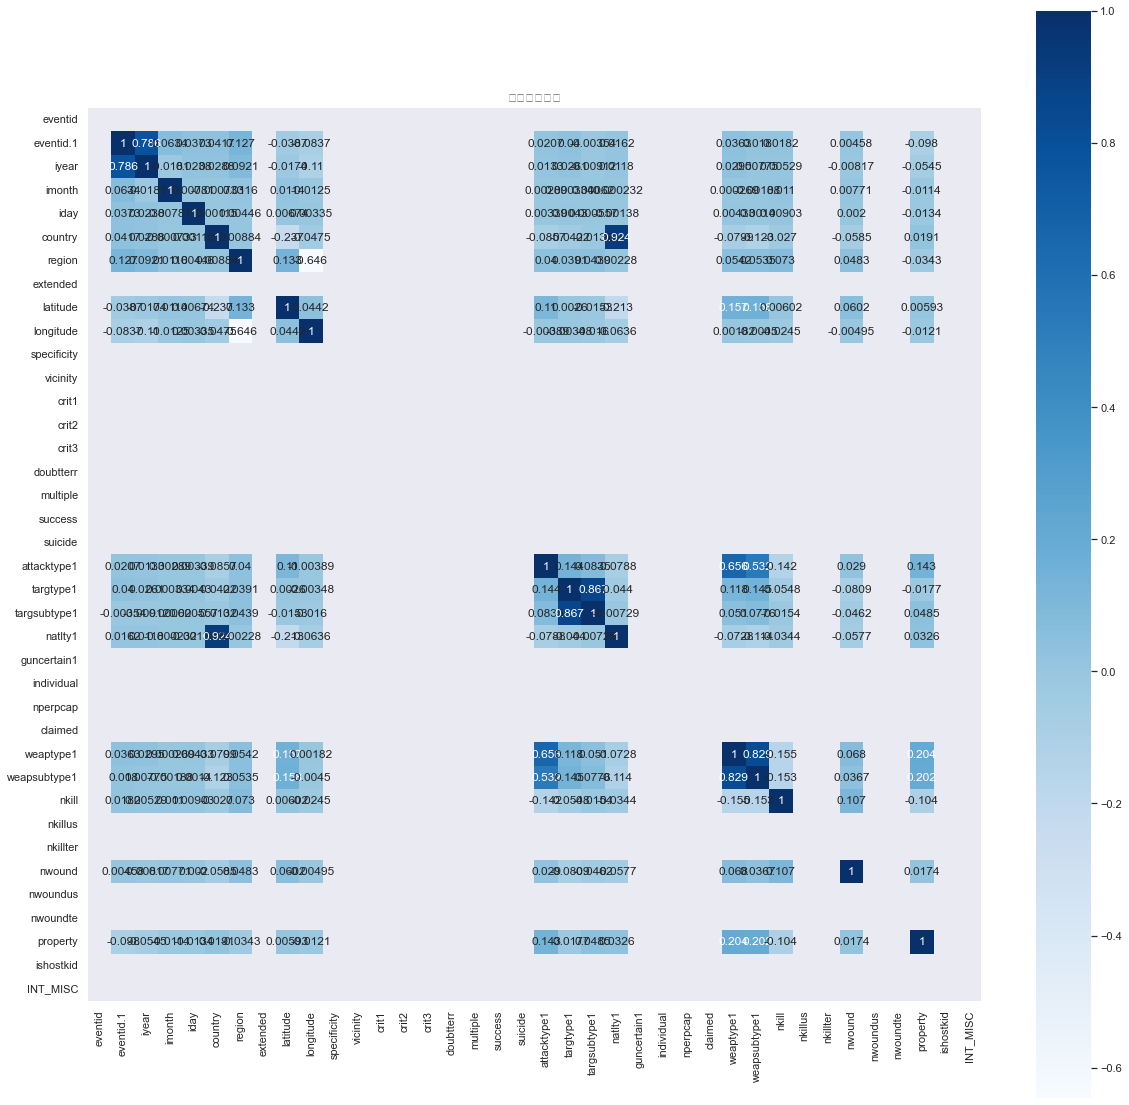

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 20),facecolor='w')
# 指定颜色带的色系
sns.heatmap(df.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.3g')
plt.title('相关性热力图')
plt.show()

### 随机森林

In [7]:
# df3 = pd.read_excel('M3TSet.xlsx')
#print(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=0, train_size=0.8,test_size=0.2)
feat_labels = X_train.columns

In [6]:
X = df.iloc[:1000,3:-1]
y = df.iloc[:1000,-1]
y

0       5
1       6
2       5
3       6
4       5
       ..
995     6
996    13
997     5
998     6
999     6
Name: weaptype1, Length: 1000, dtype: int64

In [23]:
#随机森林筛选
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#回归随机森林
rf = RandomForestRegressor(n_estimators=1000, max_depth=None,random_state=0) 
#分类随机森林 
#rf = RandomForestClassifier(n_estimators=1000, max_depth=None,random_state=0)
rf_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('standardize', StandardScaler()), ('rf', rf)])
rf_pipe.fit(X_train,y_train)

# 根据随机森林模型的拟合结果选择特征
rf = rf_pipe.__getitem__('rf')
importance = rf.feature_importances_

# np.argsort()返回待排序集合从下到大的索引值，[::-1]实现倒序，即最终imp_result内保存的是从大到小的索引值
imp_result = np.argsort(importance)[::-1][:]

# 按重要性从高到低输出属性列名和其重要性
for i in range(len(imp_result)):
    print("%2d. %-*s %f" % (i + 1, 21, feat_labels[imp_result[i]], importance[imp_result[i]]))

 1. weapsubtype1          0.791448
 2. attacktype1           0.166122
 3. nperpcap              0.011866
 4. targtype1             0.005923
 5. latitude              0.005409
 6. targsubtype1          0.005224
 7. longitude             0.005168
 8. region                0.002423
 9. country               0.002086
10. nkill                 0.002086
11. natlty1               0.000906
12. property              0.000574
13. multiple              0.000350
14. claimed               0.000140
15. guncertain1           0.000115
16. doubtterr             0.000073
17. success               0.000065
18. nwound                0.000012
19. specificity           0.000009
20. vicinity              0.000000
21. ishostkid             0.000000
22. extended              0.000000
23. nkillus               0.000000
24. nwoundus              0.000000
25. crit3                 0.000000
26. crit1                 0.000000
27. crit2                 0.000000
28. individual            0.000000
29. suicide         

In [24]:
# 获取筛选累加和为0.5后的特征
accu = 0 
fea_choosen_RF=[]
for i in range(len(imp_result)):
    if accu <= 0.76:
        accu = accu + importance[imp_result[i]]
        print("%2d. %-*s %f" % (i + 1, 20 , feat_labels[imp_result[i]], importance[imp_result[i]]))
        fea_choosen_RF.append(feat_labels[imp_result[i]])
    else:
        break
#print(accu)
print(fea_choosen_RF)

 1. weapsubtype1         0.791448
['weapsubtype1']


In [25]:
#不排序的所有特征重要性
rf_importance = pd.DataFrame(importance).T
rf_importance.columns = X.columns
rf_importance.to_excel('rf_importance.xlsx',index=None)

### LASSO筛选特征

C:\Users\67334\AppData\Local\Temp/ipykernel_14432/1284258567.py:30: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  coef_abs_sort = coef_abs.loc[x_fea,0].sort_values(0,ascending=False)


<AxesSubplot:>

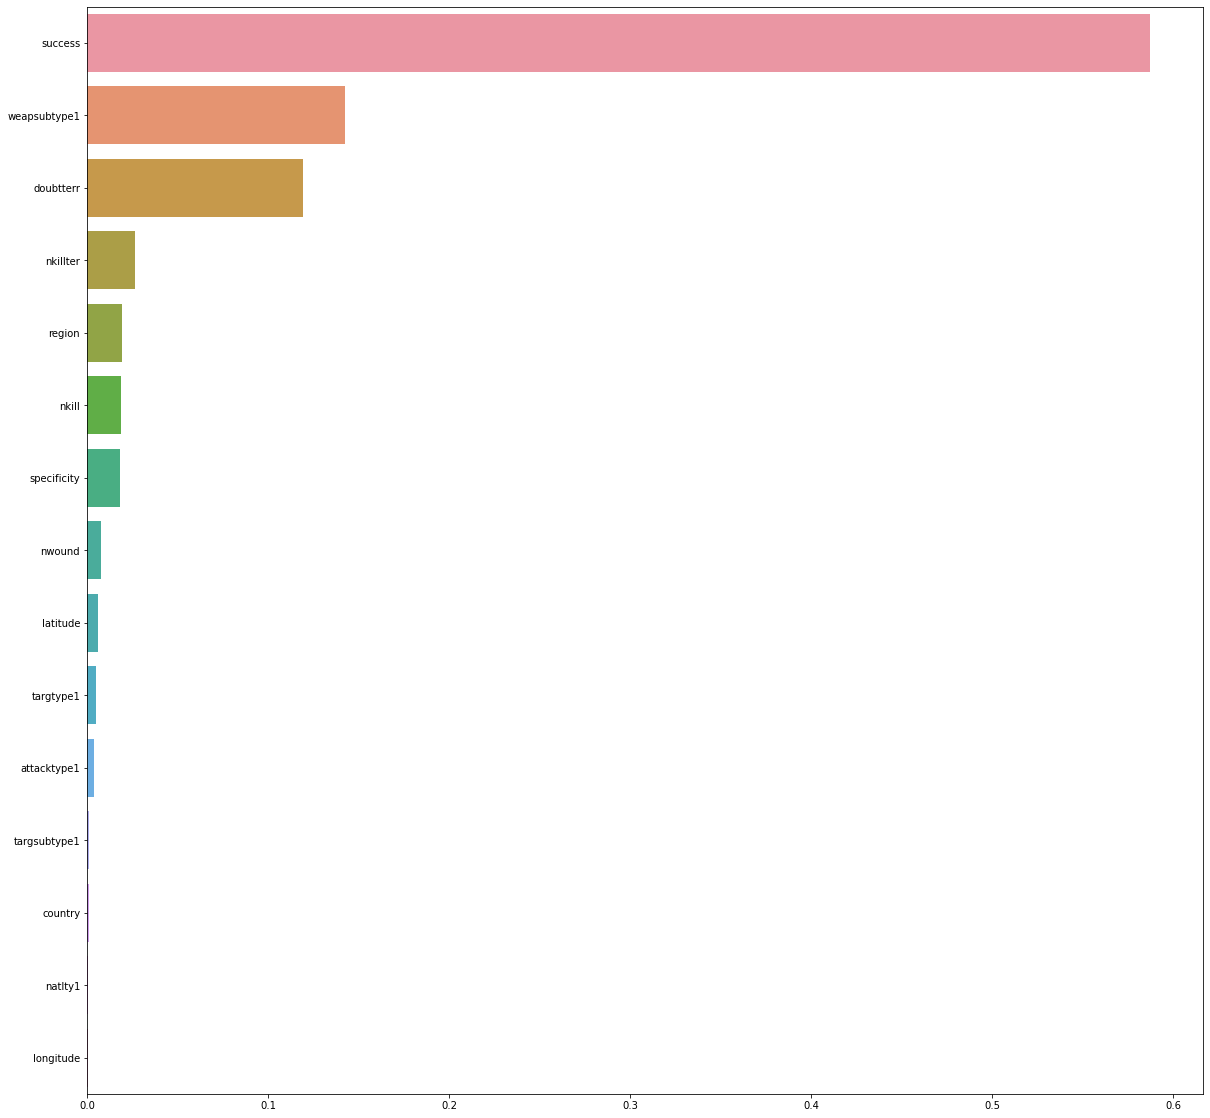

In [27]:
#LASSO筛选特征  分类和回归问题都可

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import Lasso
# x, y = data.iloc[:, :-1], data.iloc[:, -1]
# X = df.iloc[:, 7:]
# y = df.iloc[:, 1]
feat_labels = X.columns
# 取alpha=1000进行特征提取
lasso = Lasso(alpha=0.01, random_state=0)  
lasso.fit(X, y)
# 相关系数
#print('相关系数为', np.round(lasso.coef_, 5))
coef = pd.DataFrame(lasso.coef_ , index=X.columns).T
coef_ab = abs(coef)
coef_abs = coef_ab.T
#print('相关系数数组为\n', coef)
#df['相关系数'] = coef

# 返回相关系数是否为0的布尔数组
mask = lasso.coef_ != 0.00
# 利用mask对特征进行选择
x = X.loc[:, mask]
x_fea = x.columns
#将系数转化为占比
for i in range(coef_abs.shape[0]):
    coef_abs.iloc[i,0] = coef_abs.iloc[i,0] / coef_abs.values.sum()
coef_abs_sort = coef_abs.loc[x_fea,0].sort_values(0,ascending=False)
n_columns = len(x_fea)
#sort_coef = coef_ab.loc[:,x_fea].T.sort_values(0,ascending=False)
mod_coef =coef_abs_sort.values
io = mod_coef.reshape(n_columns)
#print(mod_coef)
# np.argsort()返回待排序集合从下到大的索引值，[::-1]实现倒序，即最终imp_result内保存的是从大到小的索引值
#imp_result = np.argsort(coef)[::-1][:]
#new_reg_data.to_csv('new_test02.csv')
#可视化
#for i in range(20):
#    print("%2d. %-*s %f" % (i + 1, 21, feat_labels[imp_result[i]], coef[imp_result[i]]))
# 可视化显示特征
plt.figure(figsize=(20, 20))
sns.barplot(x=io, y= coef_abs_sort.index)
#plt.title("top features importance over {} folds average.".format(folds.n_splits))
#plt.savefig('auc_roc.pdf')

In [28]:
# 获取筛选累加和为0.5后的特征
accu = 0 
fea_choosen_lasso=[]
feat_labels_lasso = coef_abs_sort.index
count = 0
for i in range(len(coef_abs_sort)):
    if (accu) <= 0.99 :
        accu = accu + coef_abs_sort[i]
        print("%2d. %-*s %f" % (i + 1, 20 , feat_labels_lasso[i], coef_abs_sort[i]))
        fea_choosen_lasso.append(feat_labels_lasso[i])
        count = count +1 
    else:
        break
#print(accu)
print(fea_choosen_lasso)
print(f'包含的特征个数:{count}')

 1. success              0.587228
 2. weapsubtype1         0.142560
 3. doubtterr            0.119493
 4. nkillter             0.026315
 5. region               0.019188
 6. nkill                0.018560
 7. specificity          0.017972
 8. nwound               0.007712
 9. latitude             0.006124
10. targtype1            0.004720
11. attacktype1          0.003968
12. targsubtype1         0.001188
13. country              0.001004
14. natlty1              0.000411
15. longitude            0.000212
['success', 'weapsubtype1', 'doubtterr', 'nkillter', 'region', 'nkill', 'specificity', 'nwound', 'latitude', 'targtype1', 'attacktype1', 'targsubtype1', 'country', 'natlty1', 'longitude']
包含的特征个数:15


### 弹性网络

C:\Users\67334\AppData\Local\Temp/ipykernel_14432/1953412376.py:22: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  coef_abs_sort = coef_abs.loc[x_fea,0].sort_values(0,ascending=False)


<AxesSubplot:>

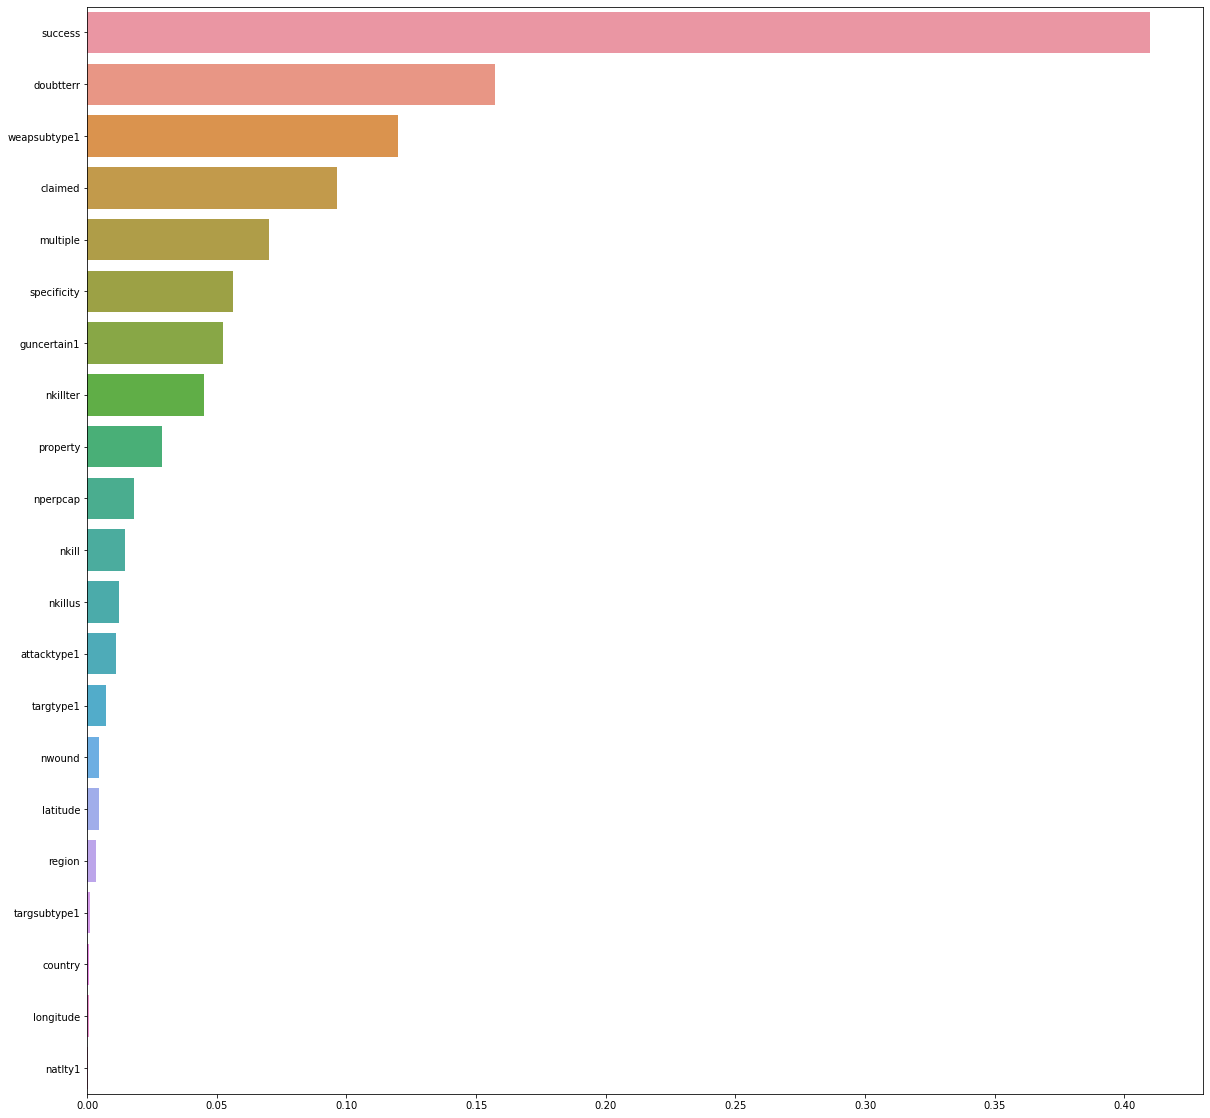

In [30]:
#Elastic主函数部分
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0,alpha=0.001,l1_ratio=0.75 )
regr.fit(X_train, y_train)
#print(regr.coef_)
#print(regr.sparse_coef_)
coef = pd.DataFrame(regr.coef_ , index=X.columns).T
coef_ab = abs(coef)
coef_abs = coef_ab.T
#print('相关系数数组为\n', coef)
#df['相关系数'] = coef

# 返回相关系数是否为0的布尔数组
mask = regr.coef_ != 0.00
# 利用mask对特征进行选择
x = X.loc[:, mask]
x_fea = x.columns
#将系数转化为占比
for i in range(coef_abs.shape[0]):
    coef_abs.iloc[i,0] = coef_abs.iloc[i,0] / coef_abs.values.sum()
coef_abs_sort = coef_abs.loc[x_fea,0].sort_values(0,ascending=False)
n_columns = len(x_fea)
#sort_coef = coef_ab.loc[:,x_fea].T.sort_values(0,ascending=False)
mod_coef =coef_abs_sort.values
io = mod_coef.reshape(n_columns)
# 可视化显示特征
plt.figure(figsize=(20, 20))
sns.barplot(x=io, y= coef_abs_sort.index)
#plt.title("top features importance over {} folds average.".format(folds.n_splits))
#plt.savefig('auc_roc.pdf')

In [31]:
# 获取筛选累加和为0.5后的特征
accu = 0 
fea_choosen_elastic=[]
feat_labels_elastic = coef_abs_sort.index
count = 0
for i in range(len(coef_abs_sort)):
    if (accu) <= 0.1 :
        accu = accu + coef_abs_sort[i]
        print("%2d. %-*s %f" % (i + 1, 20 , feat_labels_elastic[i], coef_abs_sort[i]))
        fea_choosen_elastic.append(feat_labels_lasso[i])
        count = count +1 
    else:
        break
#print(accu)
print(fea_choosen_elastic)
print(f'包含的特征个数:{count}')

 1. success              0.409911
['success']
包含的特征个数:1


In [ ]:
#保存不排序的特征和重要性
elastic_importance = pd.DataFrame(coef_abs).T
elastic_importance.columns =X.columns
elastic_importance.to_excel('elastic_importance.xlsx',index=None)
elastic_importance

### Relief

In [32]:
# -*-Relif算法main部分-*-

"""
Copyright (c) 2016 Randal S. Olson

Permission is hereby granted, free of charge, to any person obtaining a copy of this software
and associated documentation files (the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense,
and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial
portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT.
IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY,
WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE
SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""

from __future__ import print_function
import numpy as np
from sklearn.neighbors import KDTree


class ReliefF(object):

    """Feature selection using data-mined expert knowledge.

    Based on the ReliefF algorithm as introduced in:

    Kononenko, Igor et al. Overcoming the myopia of inductive learning
    algorithms with RELIEFF (1997), Applied Intelligence, 7(1), p39-55

    """

    def __init__(self, n_neighbors=100, n_features_to_keep=10):
        """Sets up ReliefF to perform feature selection.

        Parameters
        ----------
        n_neighbors: int (default: 100)
            The number of neighbors to consider when assigning feature
            importance scores.
            More neighbors results in more accurate scores, but takes longer.

        Returns
        -------
        None

        """

        self.feature_scores = None
        self.top_features = None
        self.tree = None
        self.n_neighbors = n_neighbors
        self.n_features_to_keep = n_features_to_keep

    def fit(self, X, y):
        """Computes the feature importance scores from the training data.

        Parameters
        ----------
        X: array-like {n_samples, n_features}
            Training instances to compute the feature importance scores from
        y: array-like {n_samples}
            Training labels
        }

        Returns
        -------
        None

        """
        self.feature_scores = np.zeros(X.shape[1])
        self.tree = KDTree(X)

        for source_index in range(X.shape[0]):
            distances, indices = self.tree.query(
                X[source_index].reshape(1, -1), k=self.n_neighbors+1)

            # Nearest neighbor is self, so ignore first match
            indices = indices[0][1:]

            # Create a binary array that is 1 when the source and neighbor
            #  match and -1 everywhere else, for labels and features..
            labels_match = np.equal(y[source_index], y[indices]) * 2. - 1.
            features_match = np.equal(X[source_index], X[indices]) * 2. - 1.

            # The change in feature_scores is the dot product of these  arrays
            self.feature_scores += np.dot(features_match.T, labels_match)

        self.top_features = np.argsort(self.feature_scores)[::-1]
#       self.top_features = X.index(self.feature_scores)[::-1]
        
        return self.top_features, self.feature_scores

    def transform(self, X):
        """Reduces the feature set down to the top `n_features_to_keep` features.

        Parameters
        ----------
        X: array-like {n_samples, n_features}
            Feature matrix to perform feature selection on

        Returns
        -------
        X_reduced: array-like {n_samples, n_features_to_keep}
            Reduced feature matrix

        """
        return self.top_features[:self.n_features_to_keep], X[:, self.top_features[:self.n_features_to_keep]]

    def fit_transform(self, X, y):
        """Computes the feature importance scores from the training data, then
        reduces the feature set down to the top `n_features_to_keep` features.

        Parameters
        ----------
        X: array-like {n_samples, n_features}
            Training instances to compute the feature importance scores from
        y: array-like {n_samples}
            Training labels

        Returns
        -------
        X_reduced: array-like {n_samples, n_features_to_keep}
            Reduced feature matrix

        """
        self.fit(X, y)
        return self.transform(X)

In [33]:
#实例化
a = ReliefF(n_neighbors=7,n_features_to_keep=20)

In [34]:
fea_sort_relief = a.fit(np.array(X),y)
print(fea_sort_relief)
#transoform_x = a.transform(np.array(X))

(array([14, 20,  1, 22, 24,  7, 13, 19,  8, 30,  6,  2, 29, 31, 27,  9, 17,
        0, 12, 21, 25, 10, 28, 18, 15,  5, 11, 23, 16, 26,  4,  3],
      dtype=int64), array([ 2182.,  2362.,  2302., -1324.,  -798.,  1480.,  2302.,  2302.,
        2302.,  2262.,  1876.,  1170.,  2116.,  2302.,  5102.,  1504.,
          62.,  2194.,  1514.,  2302.,  2426.,  2076.,  2310.,   284.,
        2308.,  1898.,   -42.,  2270.,  1670.,  2302.,  2302.,  2280.]))


In [35]:
#分别获取index和values
top_features = fea_sort_relief[0]
feature_scores = fea_sort_relief[1]
print(top_features,feature_scores)

[14 20  1 22 24  7 13 19  8 30  6  2 29 31 27  9 17  0 12 21 25 10 28 18
 15  5 11 23 16 26  4  3] [ 2182.  2362.  2302. -1324.  -798.  1480.  2302.  2302.  2302.  2262.
  1876.  1170.  2116.  2302.  5102.  1504.    62.  2194.  1514.  2302.
  2426.  2076.  2310.   284.  2308.  1898.   -42.  2270.  1670.  2302.
  2302.  2280.]


In [ ]:
#保存不排序的特征及其重要性
relief_importance = pd.DataFrame(feature_scores)
relief_importance = relief_importance.T
relief_importance.columns =X.columns
relief_importance.to_excel('relief_importance.xlsx',index=None)

### PCA主成分分析算法

In [37]:
#PCA特征筛选  产生新的特征不是任何一个原特征
from sklearn.decomposition import PCA
pca = PCA(n_components = 5, svd_solver='auto') #n_components是我们降维后需要的维度
pca = pca.fit(df)
print(pca.explained_variance_ratio_) #降维后的特征方差贡献率
print('累计特征方差贡献率:' , pca.explained_variance_ratio_.sum()) #PCA降维后的累计特征方差贡献率
X_train_transf = pca.transform(df)
# X_test_trans = pca.transform(X_test)
X_feature = pca.get_feature_names_out()
print(X_train_transf)
print(X_train_transf.shape)
print(X_feature)
pca.explained_variance_ratio_ 
pca.singular_values_

[0.75598063 0.08965783 0.08032967 0.03685406 0.01311852]
累计特征方差贡献率: 0.9759407176464924
[[-114.5327328     2.01345574   21.90079914  -10.41437057   37.54864461]
 [  72.10131811   56.54212068  -16.06679351    3.05326732  -28.85718807]
 [  66.57300828   59.55390561   46.44251874   92.83743738   -3.94413571]
 ...
 [  64.38009859  -20.93959454  -73.61485327    4.93661569    6.66359944]
 [ -33.37854731  -45.44908885  -15.24157894    1.98799729   -1.89653509]
 [  63.81013226  -50.92955496  -50.12155248    4.45568682    6.71631566]]
(114183, 5)
['pca0' 'pca1' 'pca2' 'pca3' 'pca4']


array([29322.34895985, 10098.05059644,  9558.3167683 ,  6474.19958601,
        3862.65429955])

### FA

In [38]:
from pandas import DataFrame,Series
from factor_analyzer import FactorAnalyzer

In [54]:
df = pd.read_csv('df_math.fillna.csv')

In [55]:
df.iloc[:,4:]

,latitude,longitude,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,country_1,...,INT_MISC_1,extended,crit1,crit2,crit3,doubtterr,multiple,success,suicide,guncertain1
0,-3.375828,29.364107,0.0,104,0,100,6.0,0,0,-0.142248,...,0.106859,0,1,1,1,1,0,1,0,0
1,55.751377,37.579914,0.0,0,0,0,3.0,0,0,-0.149410,...,0.106859,0,1,1,1,0,0,1,0,0
2,54.607712,-5.956210,0.0,1,0,0,0.0,0,0,-0.143673,...,-1.293349,0,1,1,1,0,0,1,0,0
3,33.303566,44.371773,0.0,0,0,0,0.0,0,0,0.796614,...,-1.293349,0,1,1,1,0,0,1,0,0
4,31.995965,35.271110,0.0,0,0,0,1.0,0,0,-0.144491,...,0.106859,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112320,2.359673,45.385034,0.0,1,0,0,2.0,0,0,-0.167645,...,0.106859,0,1,1,0,1,0,1,0,0
112321,35.407278,35.942679,0.0,2,0,0,7.0,0,0,-0.150287,...,-1.293349,0,1,1,0,1,0,1,0,0
112322,6.900742,124.437908,0.0,0,0,0,0.0,0,0,-0.178256,...,0.106859,0,1,1,1,0,0,1,0,0
112323,24.798346,93.940430,0.0,0,0,0,0.0,0,0,-0.241966,...,0.106859,0,1,1,1,0,0,0,0,0


In [39]:
data = df

In [40]:
# Bartlett's球状检验
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data)
chi_square_value, p_value

D:\software\Anaconda\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(nan, nan)

In [58]:
# KMO检验
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)
print(kmo_all,kmo_model)

[0.72162822 0.52342232 0.56026982 0.72673294 0.58170105 0.51451023
 0.57398623 0.65165932 0.56552978 0.68529966 0.6393635  0.67241557
 0.56671247 0.56258703 0.80118982 0.46582706 0.60618419 0.51683103
 0.46854679 0.64565683 0.12349785 0.08335939 0.43526242 0.43691285
 0.68055815 0.4524673  0.72083138 0.39917501] 0.5259149599187579


In [59]:
fa = FactorAnalyzer()
fa.fit(data)#固定公共因子个数为5个
# print("公因子方差:\n", fa.get_communalities())#公因子方差
ev,v=fa.get_eigenvalues()
print("ev:",ev) # 得到特征值ev、特征向量v
print("v:",v)

ev: [2.51413218 2.42487009 2.09403955 1.71176532 1.426247   1.30131944
 1.24916437 1.1319287  1.08087961 1.04492784 1.01251735 1.00316053
 0.99593006 0.97441882 0.95147798 0.93053075 0.86837947 0.82042807
 0.7918046  0.75016467 0.68244045 0.63051026 0.553673   0.3769021
 0.37035426 0.11199271 0.10389708 0.09214372]
v: [ 2.16918576e+00  2.11904115e+00  1.80770962e+00  8.45369977e-01
  5.74485945e-01  3.89873613e-01  3.18346441e-01  2.42716045e-01
  1.71109886e-01  1.43281830e-01  9.87748797e-02  4.19955379e-02
  1.15292247e-02 -4.27874214e-04 -9.85597069e-03 -1.66491730e-02
 -3.03490885e-02 -5.04554229e-02 -8.07811061e-02 -1.17012443e-01
 -1.33915985e-01 -1.72816634e-01 -1.87738720e-01 -2.42456326e-01
 -2.99379620e-01 -3.79555856e-01 -4.26603168e-01 -5.93132852e-01]


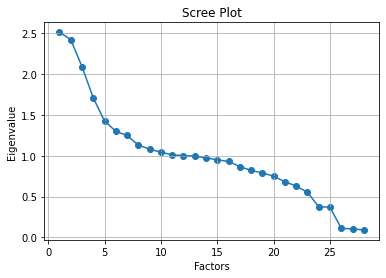

In [60]:
# 同样的数据绘制散点图和折线图
plt.scatter(range(1, data.shape[1] + 1), ev)
plt.plot(range(1, data.shape[1] + 1), ev)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
 
plt.grid()  # 显示网格
plt.show()  # 显示图形

In [37]:
# 选择方式： varimax 方差最大化
# 选择固定因子为 2 个
faa_two = FactorAnalyzer(6,rotation='varimax')
faa_two.fit(data)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [38]:
# 公因子方差
faa_two.get_communalities()

array([7.68596910e-02, 9.35080616e-03, 4.51768182e-02, 6.90282414e-04,
       5.03130448e-01, 8.06092629e-01, 7.33540831e-01, 9.60599551e-01,
       1.13764372e-03, 1.53794924e-01, 1.14197714e-01, 5.14413885e-03,
       3.23274870e-02, 7.83490705e-01, 9.37646476e-01, 1.43194247e-01,
       1.85316883e-01, 2.57716443e-01, 9.87831775e-01, 8.35958506e-03,
       6.47666100e-02, 2.85925522e-02, 7.01113247e-03, 7.21992339e-01,
       1.00079802e+00, 4.09958400e-02, 4.30019961e-01, 1.12633797e-01,
       8.61924161e-02])

In [39]:
pd.DataFrame(faa_two.get_communalities(),index=data.columns)

,0
latitude,0.076860
longitude,0.009351
nperps,0.045177
nperpcap,0.000690
nkill,0.503130
nkillus,0.806093
nkillter,0.733541
nwound,0.960600
nwoundus,0.001138
nwoundte,0.153795


In [40]:
faa_two.get_eigenvalues()

(array([2.53804793, 2.4348236 , 2.09406898, 1.73549715, 1.44299528,
        1.30396518, 1.26989977, 1.18645145, 1.13181484, 1.08085991,
        1.04438134, 1.01251684, 1.00155327, 0.97580633, 0.96002805,
        0.94726603, 0.88895666, 0.83971046, 0.79835138, 0.7501972 ,
        0.71131373, 0.6531394 , 0.5915346 , 0.55209216, 0.37686945,
        0.36987812, 0.11198879, 0.10389513, 0.09209696]),
 array([ 2.23819272e+00,  2.18454990e+00,  1.82909835e+00,  1.35948307e+00,
         9.89045465e-01,  6.41396974e-01,  4.40332671e-01,  3.72846314e-01,
         2.82572566e-01,  2.18951357e-01,  1.62003063e-01,  1.47932723e-01,
         5.85127994e-02,  2.82597597e-02,  1.65257461e-02,  7.09845228e-04,
        -7.31919518e-03, -1.20937155e-02, -2.32459615e-02, -3.72311827e-02,
        -6.51205187e-02, -1.04500693e-01, -1.19090785e-01, -1.42988925e-01,
        -1.88707297e-01, -2.20181728e-01, -2.30679839e-01, -2.67653322e-01,
        -3.12998420e-01]))

In [41]:
pd.DataFrame(faa_two.get_eigenvalues())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,2.538048,2.434824,2.094069,1.735497,1.442995,1.303965,1.269900,1.186451,1.131815,1.080860,...,0.750197,0.711314,0.653139,0.591535,0.552092,0.376869,0.369878,0.111989,0.103895,0.092097
1,2.238193,2.184550,1.829098,1.359483,0.989045,0.641397,0.440333,0.372846,0.282573,0.218951,...,-0.037231,-0.065121,-0.104501,-0.119091,-0.142989,-0.188707,-0.220182,-0.230680,-0.267653,-0.312998


In [42]:
# 变量个数*因子个数
faa_two.loadings_

array([[ 7.23299913e-03,  2.47352131e-01,  2.58914972e-02,
         1.11758597e-01,  3.11190447e-02, -3.86723349e-02],
       [-2.39765928e-02, -5.74715249e-02, -5.08133905e-03,
         1.69269125e-02, -8.63725689e-03, -7.13162702e-02],
       [ 3.25952153e-02, -9.31483277e-02, -3.73514650e-03,
        -1.09316898e-01,  1.42521989e-01, -5.62237163e-02],
       [-6.86837698e-04,  8.57050431e-03, -6.53823277e-03,
         1.65648849e-03,  2.34761857e-03, -2.37771607e-02],
       [ 5.61486752e-01,  9.61081228e-03, -2.63348006e-03,
        -6.20940746e-02,  4.19586670e-01,  8.86291439e-02],
       [ 8.96656038e-01, -7.37894001e-03,  3.63106451e-03,
         7.74210017e-03, -4.17475485e-02, -1.51705920e-02],
       [ 3.70410019e-02,  2.49727854e-02, -2.88928922e-02,
        -2.46387218e-02,  8.54419815e-01,  8.37074874e-03],
       [ 9.78205184e-01,  4.37625466e-02,  1.70654360e-02,
        -2.73940694e-02,  2.65921783e-03,  2.73911179e-02],
       [ 2.01615360e-02,  9.92353303e-03, -2.119

In [43]:
pd.DataFrame(faa_two.loadings_,index=data.columns)

,0,1,2,3,4,5
latitude,0.007233,0.247352,0.025891,0.111759,0.031119,-0.038672
longitude,-0.023977,-0.057472,-0.005081,0.016927,-0.008637,-0.071316
nperps,0.032595,-0.093148,-0.003735,-0.109317,0.142522,-0.056224
nperpcap,-0.000687,0.008571,-0.006538,0.001656,0.002348,-0.023777
nkill,0.561487,0.009611,-0.002633,-0.062094,0.419587,0.088629
nkillus,0.896656,-0.007379,0.003631,0.007742,-0.041748,-0.015171
nkillter,0.037041,0.024973,-0.028893,-0.024639,0.854420,0.008371
nwound,0.978205,0.043763,0.017065,-0.027394,0.002659,0.027391
nwoundus,0.020162,0.009924,-0.021195,-0.005776,0.008409,0.008910
nwoundte,0.013153,-0.028975,-0.025333,-0.018113,0.388993,-0.022301


In [44]:
faa_two.get_factor_variance()

(array([2.08850072, 2.07181879, 1.86773484, 1.3439307 , 1.15852914,
        0.70808756]),
 array([0.07201727, 0.07144203, 0.06440465, 0.04634244, 0.03994928,
        0.02441681]),
 array([0.07201727, 0.14345929, 0.20786394, 0.25420638, 0.29415566,
        0.31857247]))

In [45]:
df1 = pd.DataFrame(np.abs(faa_two.loadings_),index=data.columns)
df1

,0,1,2,3,4,5
latitude,0.007233,0.247352,0.025891,0.111759,0.031119,0.038672
longitude,0.023977,0.057472,0.005081,0.016927,0.008637,0.071316
nperps,0.032595,0.093148,0.003735,0.109317,0.142522,0.056224
nperpcap,0.000687,0.008571,0.006538,0.001656,0.002348,0.023777
nkill,0.561487,0.009611,0.002633,0.062094,0.419587,0.088629
nkillus,0.896656,0.007379,0.003631,0.007742,0.041748,0.015171
nkillter,0.037041,0.024973,0.028893,0.024639,0.854420,0.008371
nwound,0.978205,0.043763,0.017065,0.027394,0.002659,0.027391
nwoundus,0.020162,0.009924,0.021195,0.005776,0.008409,0.008910
nwoundte,0.013153,0.028975,0.025333,0.018113,0.388993,0.022301


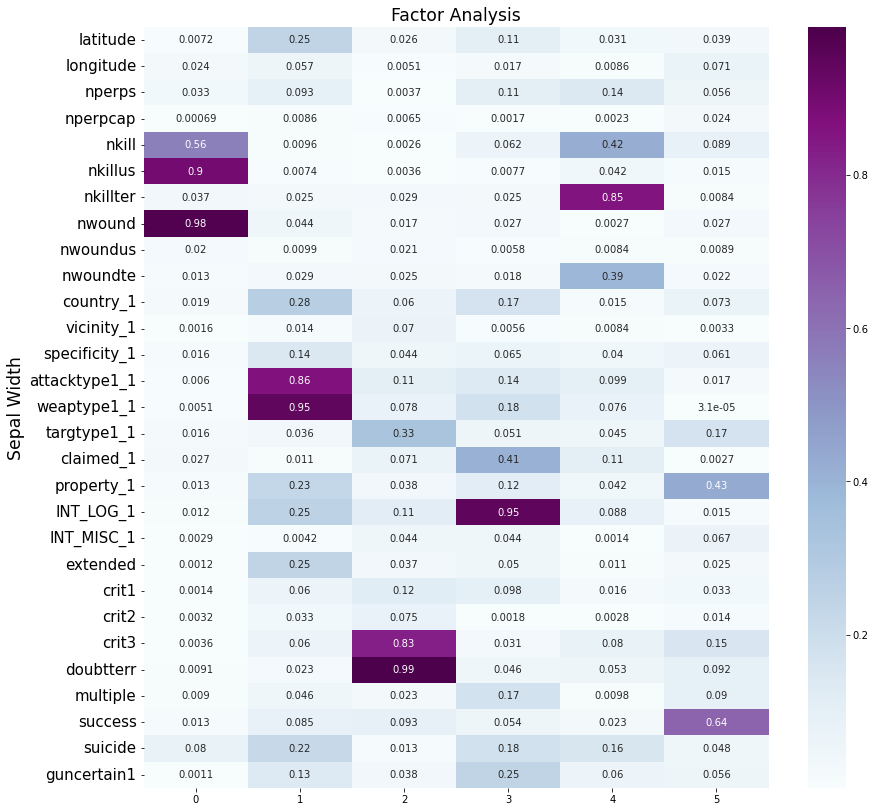

<Figure size 432x288 with 0 Axes>

In [107]:
# 绘图
 
plt.figure(figsize = (14,14))
ax = sns.heatmap(df1, annot=True, cmap="BuPu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()
 
# 保存图片
plt.savefig("factorAnalysis", dpi=500)

In [80]:
faa_two.transform(data)

ValueError: operands could not be broadcast together with shapes (112325,28) (29,) 

In [48]:
df2 = pd.DataFrame(faa_two.transform(data))
df2

,0,1,2,3,4,5
0,0.608744,-0.140787,-2.087103,0.921861,19.451451,1.711655
1,-0.045452,0.940037,0.492675,0.598695,-0.136574,-0.107458
2,-0.037595,-1.428083,0.469133,-0.745544,0.087206,-0.097158
3,-0.118496,0.988629,0.441682,0.492741,-0.168026,0.463076
4,0.044987,-1.250360,0.674646,1.330036,0.029042,-1.579915
...,...,...,...,...,...,...
112320,0.030618,-1.300283,-2.439008,-0.501165,-0.029394,-0.133699
112321,0.083157,1.180149,-2.260205,0.713163,-0.222621,0.095841
112322,-0.110814,-0.889041,0.300599,-1.272690,-0.220580,0.462711
112323,-0.086470,0.825250,0.582410,0.540323,-0.179017,-1.476037


In [225]:
wang = pd.DataFrame(faa_two.get_factor_variance())
# 总方差贡献：variance (numpy array) – The factor variances
# 方差贡献率：proportional_variance (numpy array) – The proportional factor variances
# 累积方差贡献率：cumulative_variances (numpy array) – The cumulative factor variances
wang

,0,1,2,3,4,5
0,2.088501,2.071819,1.867735,1.343931,1.158529,0.708088
1,0.072017,0.071442,0.064405,0.046342,0.039949,0.024417
2,0.072017,0.143459,0.207864,0.254206,0.294156,0.318572


In [108]:
vsum = wang.iloc[0,:].sum()
index = wang.iloc[0,:]/vsum
vdf2 = df2*index
vdf = vdf2
for i in range(vdf2.shape[0]):
    vdf.loc[i,'result'] = vdf2.iloc[i,:].sum()

In [149]:
print(index)
print()
vdf.to_csv('vdf.csv')

0    0.226062
1    0.224257
2    0.202166
3    0.145469
4    0.125401
5    0.076644
Name: 0, dtype: float64



In [151]:
y_test = vdf['result']
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
y_test = min_max_scaler.fit_transform(np.array(y_test).reshape(1, -1))
y_test

array([[0., 0., 0., ..., 0., 0., 0.]])

### mRMR

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=0, train_size=0.8,test_size=0.2)
feat_labels = X_train.columns

In [8]:
# mRMR筛选特征  安装方法需要手动改一下包的内容，否则这会报错。 分类问题 参数categorical=True;回归问题categorical = False
import numpy as np
import mifs
#X_train = X_train.astype(int)
#y_train = y_train.astype(int)
feat_selector = mifs.MutualInformationFeatureSelector(method='MRMR', n_features=20, categorical=False, verbose = 2)
feat_selector.fit(X_train,y_train)
feat_selector.ranking_

ModuleNotFoundError: No module named 'mifs'

### 信息熵计算

In [9]:
#信息熵（香农熵）计算
from math import log
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

In [10]:
from math import log

def entropy1(anArray):
    """
    计算信息熵（香浓熵）
    """
    entropy = 0.0                      # 信息熵（香农熵）

    feature_dict = {}                  # 用字典键获取不重复的取值
    for i in list(anArray):
        feature_dict.update({i:None,})
    
    # 计算所有不同特征值取值的概率进而计算信息熵
    for i in feature_dict:                              # 这里每一个i是不重复的特征取值(每个特征出现一次)
        ct = list(anArray).count(i)                     # 计算某个特征取值为i的频数
        pi = ct / len(anArray)                          # 计算出特征值i在该特征中出现的概率 pi
        if pi == 0:                                     # 这个条件相当于人为定义log0=1
            entropy = entropy - 1
        else:
            entropy = entropy - pi * log(pi,2)          # 以2位底求熵
    return entropy

## 分类算法

In [20]:
# 1.读取数据集
# data = pd.read_excel('.xlsx')
data0 = pd.read_csv('df_wenben.csv')

In [93]:
# data = data.iloc[:,4:]
data = data0.iloc[:1000,2:]
data = data.iloc[:,:-2]
data

,iyear,imonth,iday,country,region,extended,latitude,longitude,specificity,vicinity,...,claimed,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,property,ishostkid,INT_MISC
0,1998,1,1,34,11,0,-3.375828,29.364107,1,0,...,0,5,104,0,100,6.0,0,0,0,0
1,1998,1,1,167,9,0,55.751377,37.579914,1,0,...,0,14,0,0,0,3.0,0,0,0,0
2,1998,1,1,603,8,0,54.607712,-5.956210,1,0,...,1,2,1,0,0,0.0,0,0,0,1
3,1998,1,2,95,10,0,33.303566,44.371773,1,0,...,0,11,0,0,0,0.0,0,1,0,1
4,1998,1,2,155,10,0,31.995965,35.271110,4,0,...,0,2,0,0,0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1999,1,30,183,11,0,-33.941849,18.419640,1,0,...,0,16,0,0,0,1.0,0,1,0,0
996,1999,1,31,228,10,0,32.520231,44.623825,5,0,...,0,12,0,0,0,0.0,0,0,1,1
997,1999,2,1,213,11,1,-0.700000,31.750000,1,0,...,0,2,8,0,0,0.0,0,0,1,1
998,1999,2,2,603,8,0,54.713382,-6.216761,1,0,...,1,16,0,0,0,0.0,0,0,0,1


In [94]:
# 2.划分数据与标签
X, y = np.split(data, indices_or_sections=(data.shape[1]-1,), axis=1)  # x为数据，y为标签
feat_labels = X.columns
print(X,y)

      iyear  imonth  iday  country  region  extended   latitude  longitude  \
0    1998.0     1.0   1.0     34.0    11.0       0.0  -3.375828  29.364107   
1    1998.0     1.0   1.0    167.0     9.0       0.0  55.751377  37.579914   
2    1998.0     1.0   1.0    603.0     8.0       0.0  54.607712  -5.956210   
3    1998.0     1.0   2.0     95.0    10.0       0.0  33.303566  44.371773   
4    1998.0     1.0   2.0    155.0    10.0       0.0  31.995965  35.271110   
..      ...     ...   ...      ...     ...       ...        ...        ...   
995  1999.0     1.0  30.0    183.0    11.0       0.0 -33.941849  18.419640   
996  1999.0     1.0  31.0    228.0    10.0       0.0  32.520231  44.623825   
997  1999.0     2.0   1.0    213.0    11.0       1.0  -0.700000  31.750000   
998  1999.0     2.0   2.0    603.0     8.0       0.0  54.713382  -6.216761   
999  1999.0     2.0   2.0    167.0     9.0       0.0  42.985420  47.450668   

     specificity  vicinity  ...  nperpcap  claimed  weapsubtype

In [43]:
# 重新编码[ 2.  5.  6.  7.  8.  9. 11. 13.] →[0 1 2 3 4 5 6 7]
# 多分类时，可能使用
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_inverse = y
y = le.fit_transform(y)
print('le.classes_:',le.classes_,'\ny:',y_inverse,'\n','y_tran:',y,'le.inverse_transform:',le.inverse_transform([1,2]))

le.classes_: [ 2.  5.  6.  7.  8.  9. 11. 13.] 
y:      weaptype1
0          5.0
1          6.0
2          5.0
3          6.0
4          5.0
..         ...
995        6.0
996       13.0
997        5.0
998        6.0
999        6.0

[1000 rows x 1 columns] 
 y_tran: [1 2 1 2 1 2 2 2 2 1 1 1 2 5 5 2 5 5 2 2 5 2 1 2 1 1 2 2 2 2 2 2 5 2 2 2 2
 1 2 4 2 1 1 1 1 2 2 2 5 2 1 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 5 2 4 7 2 4 4
 1 5 7 7 1 1 2 2 7 5 2 2 1 1 2 5 7 2 1 2 2 2 2 2 2 2 2 2 2 1 1 5 5 2 5 2 2
 2 2 4 4 2 2 2 2 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 1 2
 2 2 2 2 1 2 2 3 2 7 2 2 1 0 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 6 6 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 1
 1 2 7 1 7 7 2 1 2 0 2 1 5 2 1 2 2 4 7 2 4 2 2 1 2 5 2 2 1 1 2 2 2 2 2 2 4
 2 2 1 1 0 0 0 0 0 0 2 1 2 2 4 2 2 2 1 2 4 1 2 1 7 1 2 5 2 1 2 2 2 5 2 2 2
 2 2 2 2 2 2 2 1 1 2 2 1 1 4 2 1 1 1 4 4 1 1 5 2 1 1 1 2 2 2 4 0 2 1 2 2 2
 2 2 2 4 4 4 0 5 1 2 1 4 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 7 2 

D:\software\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=0, train_size=0.8,test_size=0.2)
X_train

,iyear,imonth,iday,country,region,extended,latitude,longitude,specificity,vicinity,...,nperpcap,claimed,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,property,ishostkid
687,1998.0,9.0,27.0,6.0,10.0,0.0,36.350833,1.682222,1.0,0.0,...,0.0,0.0,14.0,6.0,0.0,0.0,15.0,0.0,0.0,0.0
500,1998.0,7.0,30.0,6.0,10.0,0.0,36.763763,3.055413,1.0,0.0,...,0.0,0.0,16.0,2.0,0.0,0.0,10.0,0.0,0.0,0.0
332,1998.0,5.0,10.0,235.0,9.0,0.0,42.659809,20.307119,1.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
979,1999.0,1.0,23.0,92.0,6.0,0.0,22.232255,83.685368,1.0,0.0,...,14.0,0.0,18.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
817,1998.0,11.0,2.0,202.0,7.0,0.0,37.836165,68.779826,1.0,0.0,...,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1998.0,11.0,8.0,235.0,9.0,0.0,42.482719,20.745982,1.0,0.0,...,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
192,1998.0,3.0,7.0,6.0,10.0,0.0,36.763763,3.055413,1.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,12.0,0.0,1.0,0.0
629,1998.0,8.0,29.0,209.0,10.0,0.0,41.106178,28.689863,1.0,0.0,...,0.0,0.0,14.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
559,1998.0,8.0,5.0,98.0,8.0,0.0,45.072731,7.679541,1.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 深度森林

In [96]:
#————————————————* Deepforest深度森林代码 *—————————————— 适用于测试任务，此部分定义主要类，不需要额外的库!
#!usr/bin/env python
"""
Version : 0.1.6
Date : 15th April 2017

Author : Pierre-Yves Lablanche
Email : plablanche@aims.ac.za
Affiliation : African Institute for Mathematical Sciences - South Africa
              Stellenbosch University - South Africa

License : MIT

Status : Not Under Active Development

Description :
Python3 implementation of the gcForest algorithm preesented in Zhou and Feng 2017
(paper can be found here : https://arxiv.org/abs/1702.08835 ).
It uses the typical scikit-learn syntax  with a .fit() function for training
and a .predict() function for predictions.

"""
import itertools
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

__author__ = "Pierre-Yves Lablanche"
__email__ = "plablanche@aims.ac.za"
__license__ = "MIT"
__version__ = "0.1.6"
#__status__ = "Development"


# noinspection PyUnboundLocalVariable
class gcForest(object):

    def __init__(self, shape_1X=None, n_mgsRFtree=30, window=None, stride=1,
                 cascade_test_size=0.2, n_cascadeRF=2, n_cascadeRFtree=101, cascade_layer=np.inf,
                 min_samples_mgs=0.1, min_samples_cascade=0.05, tolerance=0.0, n_jobs=1):
        """ gcForest Classifier.

        :param shape_1X: int or tuple list or np.array (default=None)
            Shape of a single sample element [n_lines, n_cols]. Required when calling mg_scanning!
            For sequence data a single int can be given.

        :param n_mgsRFtree: int (default=30)
            Number of trees in a Random Forest during Multi Grain Scanning.

        :param window: int (default=None)
            List of window sizes to use during Multi Grain Scanning.
            If 'None' no slicing will be done.

        :param stride: int (default=1)
            Step used when slicing the data.

        :param cascade_test_size: float or int (default=0.2)
            Split fraction or absolute number for cascade training set splitting.

        :param n_cascadeRF: int (default=2)
            Number of Random Forests in a cascade layer.
            For each pseudo Random Forest a complete Random Forest is created, hence
            the total numbe of Random Forests in a layer will be 2*n_cascadeRF.

        :param n_cascadeRFtree: int (default=101)
            Number of trees in a single Random Forest in a cascade layer.

        :param min_samples_mgs: float or int (default=0.1)
            Minimum number of samples in a node to perform a split
            during the training of Multi-Grain Scanning Random Forest.
            If int number_of_samples = int.
            If float, min_samples represents the fraction of the initial n_samples to consider.

        :param min_samples_cascade: float or int (default=0.1)
            Minimum number of samples in a node to perform a split
            during the training of Cascade Random Forest.
            If int number_of_samples = int.
            If float, min_samples represents the fraction of the initial n_samples to consider.

        :param cascade_layer: int (default=np.inf)
            mMximum number of cascade layers allowed.
            Useful to limit the contruction of the cascade.

        :param tolerance: float (default=0.0)
            Accuracy tolerance for the casacade growth.
            If the improvement in accuracy is not better than the tolerance the construction is
            stopped.

        :param n_jobs: int (default=1)
            The number of jobs to run in parallel for any Random Forest fit and predict.
            If -1, then the number of jobs is set to the number of cores.
        """
        setattr(self, 'shape_1X', shape_1X)
        setattr(self, 'n_layer', 0)
        setattr(self, '_n_samples', 0)
        setattr(self, 'n_cascadeRF', int(n_cascadeRF))
        if isinstance(window, int):
            setattr(self, 'window', [window])
        elif isinstance(window, list):
            setattr(self, 'window', window)
        setattr(self, 'stride', stride)
        setattr(self, 'cascade_test_size', cascade_test_size)
        setattr(self, 'n_mgsRFtree', int(n_mgsRFtree))
        setattr(self, 'n_cascadeRFtree', int(n_cascadeRFtree))
        setattr(self, 'cascade_layer', cascade_layer)
        setattr(self, 'min_samples_mgs', min_samples_mgs)
        setattr(self, 'min_samples_cascade', min_samples_cascade)
        setattr(self, 'tolerance', tolerance)
        setattr(self, 'n_jobs', n_jobs)

    def fit(self, X, y):
        """ Training the gcForest on input data X and associated target y.

        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.

        :param y: np.array
            1D array containing the target values.
            Must be of shape [n_samples]
        """
        if np.shape(X)[0] != len(y):
            raise ValueError('Sizes of y and X do not match.')

        mgs_X = self.mg_scanning(X, y)
        _ = self.cascade_forest(mgs_X, y)

    def predict_proba(self, X):
        """ Predict the class probabilities of unknown samples X.

        :param X: np.array
            Array containing the input samples.
            Must be of the same shape [n_samples, data] as the training inputs.

        :return: np.array
            1D array containing the predicted class probabilities for each input sample.
        """
        mgs_X = self.mg_scanning(X)
        cascade_all_pred_prob = self.cascade_forest(mgs_X)
        predict_proba = np.mean(cascade_all_pred_prob, axis=0)

        return predict_proba

    def predict(self, X):
        """ Predict the class of unknown samples X.

        :param X: np.array
            Array containing the input samples.
            Must be of the same shape [n_samples, data] as the training inputs.

        :return: np.array
            1D array containing the predicted class for each input sample.
        """
        pred_proba = self.predict_proba(X=X)
        predictions = np.argmax(pred_proba, axis=1)

        return predictions

    def mg_scanning(self, X, y=None):
        """ Performs a Multi Grain Scanning on input data.

        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.

        :param y: np.array (default=None)

        :return: np.array
            Array of shape [n_samples, .. ] containing Multi Grain Scanning sliced data.
        """
        setattr(self, '_n_samples', np.shape(X)[0])
        shape_1X = getattr(self, 'shape_1X')
        if isinstance(shape_1X, int):
            shape_1X = [1,shape_1X]
        if not getattr(self, 'window'):
            setattr(self, 'window', [shape_1X[1]])

        mgs_pred_prob = []

        for wdw_size in getattr(self, 'window'):
            wdw_pred_prob = self.window_slicing_pred_prob(X, wdw_size, shape_1X, y=y)
            mgs_pred_prob.append(wdw_pred_prob)

        return np.concatenate(mgs_pred_prob, axis=1)

    def window_slicing_pred_prob(self, X, window, shape_1X, y=None):
        """ Performs a window slicing of the input data and send them through Random Forests.
        If target values 'y' are provided sliced data are then used to train the Random Forests.

        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.

        :param window: int
            Size of the window to use for slicing.

        :param shape_1X: list or np.array
            Shape of a single sample.

        :param y: np.array (default=None)
            Target values. If 'None' no training is done.

        :return: np.array
            Array of size [n_samples, ..] containing the Random Forest.
            prediction probability for each input sample.
        """
        n_tree = getattr(self, 'n_mgsRFtree')
        min_samples = getattr(self, 'min_samples_mgs')
        stride = getattr(self, 'stride')

        if shape_1X[0] > 1:
            print('Slicing Images...')
            sliced_X, sliced_y = self._window_slicing_img(X, window, shape_1X, y=y, stride=stride)
        else:
            print('Slicing Sequence...')
            sliced_X, sliced_y = self._window_slicing_sequence(X, window, shape_1X, y=y, stride=stride)

        if y is not None:
            n_jobs = getattr(self, 'n_jobs')
            prf = RandomForestClassifier(n_estimators=n_tree, max_features='sqrt',
                                         min_samples_split=min_samples, oob_score=True, n_jobs=n_jobs)
            crf = RandomForestClassifier(n_estimators=n_tree, max_features=1,
                                         min_samples_split=min_samples, oob_score=True, n_jobs=n_jobs)
            print('Training MGS Random Forests...')
            prf.fit(sliced_X, sliced_y)
            crf.fit(sliced_X, sliced_y)
            setattr(self, '_mgsprf_{}'.format(window), prf)
            setattr(self, '_mgscrf_{}'.format(window), crf)
            pred_prob_prf = prf.oob_decision_function_
            pred_prob_crf = crf.oob_decision_function_

        if hasattr(self, '_mgsprf_{}'.format(window)) and y is None:
            prf = getattr(self, '_mgsprf_{}'.format(window))
            crf = getattr(self, '_mgscrf_{}'.format(window))
            pred_prob_prf = prf.predict_proba(sliced_X)
            pred_prob_crf = crf.predict_proba(sliced_X)

        pred_prob = np.c_[pred_prob_prf, pred_prob_crf]

        return pred_prob.reshape([getattr(self, '_n_samples'), -1])

    def _window_slicing_img(self, X, window, shape_1X, y=None, stride=1):
        """ Slicing procedure for images

        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.

        :param window: int
            Size of the window to use for slicing.

        :param shape_1X: list or np.array
            Shape of a single sample [n_lines, n_cols].

        :param y: np.array (default=None)
            Target values.

        :param stride: int (default=1)
            Step used when slicing the data.

        :return: np.array and np.array
            Arrays containing the sliced images and target values (empty if 'y' is None).
        """
        if any(s < window for s in shape_1X):
            raise ValueError('window must be smaller than both dimensions for an image')

        len_iter_x = np.floor_divide((shape_1X[1] - window), stride) + 1
        len_iter_y = np.floor_divide((shape_1X[0] - window), stride) + 1
        iterx_array = np.arange(0, stride*len_iter_x, stride)
        itery_array = np.arange(0, stride*len_iter_y, stride)

        ref_row = np.arange(0, window)
        ref_ind = np.ravel([ref_row + shape_1X[1] * i for i in range(window)])
        inds_to_take = [ref_ind + ix + shape_1X[1] * iy
                        for ix, iy in itertools.product(iterx_array, itery_array)]

        sliced_imgs = np.take(X, inds_to_take, axis=1).reshape(-1, window**2)

        if y is not None:
            sliced_target = np.repeat(y, len_iter_x * len_iter_y)
        elif y is None:
            sliced_target = None

        return sliced_imgs, sliced_target

    def _window_slicing_sequence(self, X, window, shape_1X, y=None, stride=1):
        """ Slicing procedure for sequences (aka shape_1X = [.., 1]).

        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.

        :param window: int
            Size of the window to use for slicing.

        :param shape_1X: list or np.array
            Shape of a single sample [n_lines, n_col].

        :param y: np.array (default=None)
            Target values.

        :param stride: int (default=1)
            Step used when slicing the data.

        :return: np.array and np.array
            Arrays containing the sliced sequences and target values (empty if 'y' is None).
        """
        if shape_1X[1] < window:
            raise ValueError('window must be smaller than the sequence dimension')

        len_iter = np.floor_divide((shape_1X[1] - window), stride) + 1
        iter_array = np.arange(0, stride*len_iter, stride)

        ind_1X = np.arange(np.prod(shape_1X))
        inds_to_take = [ind_1X[i:i+window] for i in iter_array]
        print(np.array(X))
        sliced_sqce = np.take(np.array(X), inds_to_take, axis=1).reshape(-1, window)

        if y is not None:
            sliced_target = np.repeat(y, len_iter)
        elif y is None:
            sliced_target = None

        return sliced_sqce, sliced_target

    def cascade_forest(self, X, y=None):
        """ Perform (or train if 'y' is not None) a cascade forest estimator.

        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.

        :param y: np.array (default=None)
            Target values. If 'None' perform training.

        :return: np.array
            1D array containing the predicted class for each input sample.
        """
        if y is not None:
            setattr(self, 'n_layer', 0)
            test_size = getattr(self, 'cascade_test_size')
            max_layers = getattr(self, 'cascade_layer')
            tol = getattr(self, 'tolerance')

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

            self.n_layer += 1
            prf_crf_pred_ref = self._cascade_layer(X_train, y_train)
            accuracy_ref = self._cascade_evaluation(X_test, y_test)
            feat_arr = self._create_feat_arr(X_train, prf_crf_pred_ref)

            self.n_layer += 1
            prf_crf_pred_layer = self._cascade_layer(feat_arr, y_train)
            accuracy_layer = self._cascade_evaluation(X_test, y_test)

            while accuracy_layer > (accuracy_ref + tol) and self.n_layer <= max_layers:
                accuracy_ref = accuracy_layer
                prf_crf_pred_ref = prf_crf_pred_layer
                feat_arr = self._create_feat_arr(X_train, prf_crf_pred_ref)
                self.n_layer += 1
                prf_crf_pred_layer = self._cascade_layer(feat_arr, y_train)
                accuracy_layer = self._cascade_evaluation(X_test, y_test)

            if accuracy_layer < accuracy_ref :
                n_cascadeRF = getattr(self, 'n_cascadeRF')
                for irf in range(n_cascadeRF):
                    delattr(self, '_casprf{}_{}'.format(self.n_layer, irf))
                    delattr(self, '_cascrf{}_{}'.format(self.n_layer, irf))
                self.n_layer -= 1

        elif y is None:
            at_layer = 1
            prf_crf_pred_ref = self._cascade_layer(X, layer=at_layer)
            while at_layer < getattr(self, 'n_layer'):
                at_layer += 1
                feat_arr = self._create_feat_arr(X, prf_crf_pred_ref)
                prf_crf_pred_ref = self._cascade_layer(feat_arr, layer=at_layer)

        return prf_crf_pred_ref

    def _cascade_layer(self, X, y=None, layer=0):
        """ Cascade layer containing Random Forest estimators.
        If y is not None the layer is trained.

        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.

        :param y: np.array (default=None)
            Target values. If 'None' perform training.

        :param layer: int (default=0)
            Layer indice. Used to call the previously trained layer.

        :return: list
            List containing the prediction probabilities for all samples.
        """
        n_tree = getattr(self, 'n_cascadeRFtree')
        n_cascadeRF = getattr(self, 'n_cascadeRF')
        min_samples = getattr(self, 'min_samples_cascade')

        n_jobs = getattr(self, 'n_jobs')
        prf = RandomForestClassifier(n_estimators=n_tree, max_features='sqrt',
                                     min_samples_split=min_samples, oob_score=True, n_jobs=n_jobs)
        crf = RandomForestClassifier(n_estimators=n_tree, max_features=1,
                                     min_samples_split=min_samples, oob_score=True, n_jobs=n_jobs)

        prf_crf_pred = []
        if y is not None:
            print('Adding/Training Layer, n_layer={}'.format(self.n_layer))
            for irf in range(n_cascadeRF):
                prf.fit(X, y)
                crf.fit(X, y)
                setattr(self, '_casprf{}_{}'.format(self.n_layer, irf), prf)
                setattr(self, '_cascrf{}_{}'.format(self.n_layer, irf), crf)
                prf_crf_pred.append(prf.oob_decision_function_)
                prf_crf_pred.append(crf.oob_decision_function_)
        elif y is None:
            for irf in range(n_cascadeRF):
                prf = getattr(self, '_casprf{}_{}'.format(layer, irf))
                crf = getattr(self, '_cascrf{}_{}'.format(layer, irf))
                prf_crf_pred.append(prf.predict_proba(X))
                prf_crf_pred.append(crf.predict_proba(X))

        return prf_crf_pred

    def _cascade_evaluation(self, X_test, y_test):
        """ Evaluate the accuracy of the cascade using X and y.

        :param X_test: np.array
            Array containing the test input samples.
            Must be of the same shape as training data.

        :param y_test: np.array
            Test target values.

        :return: float
            the cascade accuracy.
        """
        casc_pred_prob = np.mean(self.cascade_forest(X_test), axis=0)
        casc_pred = np.argmax(casc_pred_prob, axis=1)
        casc_accuracy = accuracy_score(y_true=y_test, y_pred=casc_pred)
        print('Layer validation accuracy = {}'.format(casc_accuracy))

        return casc_accuracy

    def _create_feat_arr(self, X, prf_crf_pred):
        """ Concatenate the original feature vector with the predicition probabilities
        of a cascade layer.

        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.

        :param prf_crf_pred: list
            Prediction probabilities by a cascade layer for X.

        :return: np.array
            Concatenation of X and the predicted probabilities.
            To be used for the next layer in a cascade forest.
        """
        swap_pred = np.swapaxes(prf_crf_pred, 0, 1)
        add_feat = swap_pred.reshape([np.shape(X)[0], -1])
        feat_arr = np.concatenate([add_feat, X], axis=1)

        return feat_arr

In [97]:
#gcforest 进行分类任务预测
#from gcforest.gcforest import GCForest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm,recall_score as recall,roc_auc_score as auc
#data = pd.read_csv('data.csv',header=None,encoding='utf-16')
#x = data.iloc[:,0:264]
#y = data.iloc[:,-1]
#x = x.fillna(0)
# x = np.array(x)
# #y = y.fillna(0)
# y = np.array(y)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
model = gcForest(shape_1X=X.shape[1], n_mgsRFtree=30, window=30)
model.fit(X_train, y_train) #fit(X,y) 在输入数据X和相关目标y上训练gcForest;
y_predict = model.predict(X_test) #预测未知样本X的类别;
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=y_predict)
print('gcForest accuracy : {}'.format(accuracy))

#4.绘图
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
#plt.savefig('auc_roc.pdf')
plt.show()

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(ncols=1, figsize=(6,6))
sns.heatmap(cm, annot=True,ax=ax, fmt='d',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            linewidths=.2,linecolor="Darkblue", cmap="Blues",annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]
# for title, normalize in titles_options:
#     disp = ConfusionMatrixDisplay.from_estimator(
#         rf_pipe,
#         X_test,
#         y_test,
#         display_labels=['0','1'],
# #         display_labels=['0','1','2','3','4','5','6','7'],
#         cmap=plt.cm.Blues,
#         normalize=normalize,
#     )
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

Slicing Sequence...
[[1.998e+03 9.000e+00 2.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.998e+03 7.000e+00 3.000e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.998e+03 5.000e+00 1.000e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [1.998e+03 8.000e+00 2.900e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.998e+03 8.000e+00 5.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.998e+03 9.000e+00 2.500e+01 ... 0.000e+00 1.000e+00 0.000e+00]]


ValueError: Shape of passed values is (3200, 1), indices imply (800, 1)

INT_MISC    190.0
dtype: float64

### 随机森林

D:\software\Anaconda\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


The accuracy of the train_RF is: 1.0
The accuracy of the test_RF is: 0.94


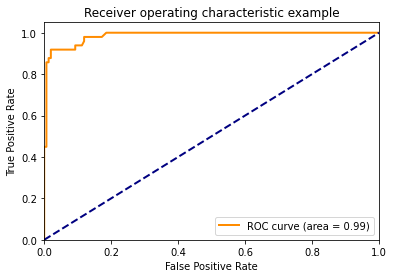

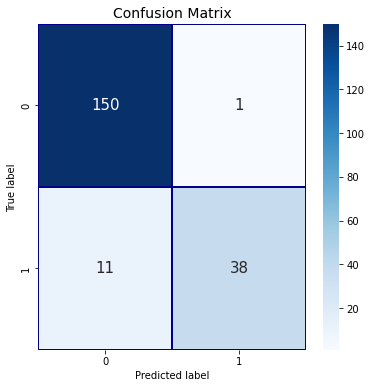

In [149]:
#随机森林做 “分类问题” 评价指标————ROC曲线+混淆矩阵
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
# print(type(X_train), type(y_train))
rf = RandomForestClassifier(n_estimators=1000, random_state=0,max_depth=None)
rf_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('standardize', StandardScaler()), ('rf', rf)])
rf_pipe.fit(X_train, y_train)
y_pred_train = rf_pipe.predict(X_train)
y_pred = rf_pipe.predict(X_test)
y_pred_proba = rf_pipe.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1], pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
print('The accuracy of the train_RF is:',metrics.accuracy_score(y_train,y_pred_train))
print('The accuracy of the test_RF is:',metrics.accuracy_score(y_test,y_pred))
#4.绘图
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
#plt.savefig('auc_roc.pdf')
plt.show()

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(ncols=1, figsize=(6,6))
sns.heatmap(cm, annot=True,ax=ax, fmt='d',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            linewidths=.2,linecolor="Darkblue", cmap="Blues",annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]
# for title, normalize in titles_options:
#     disp = ConfusionMatrixDisplay.from_estimator(
#         rf_pipe,
#         X_test,
#         y_test,
#         display_labels=['0','1'],
#         cmap=plt.cm.Blues,
#         normalize=normalize,
#     )
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

### SVM支持向量机

训练集得分： 0.91625
测试集得分： 0.865


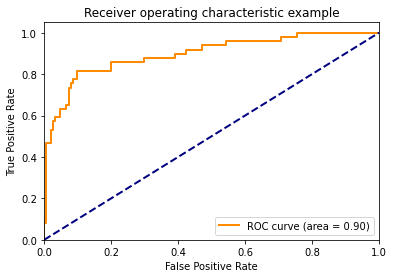

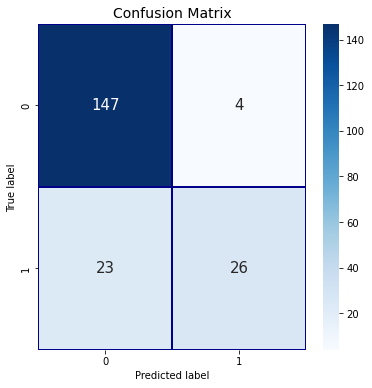

In [150]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import requests, xlrd, re, xlwt, json
from sklearn.metrics import accuracy_score,confusion_matrix
# 1.读取数据集
#data = pd.read_excel('data_female.xlsx')

# 2.划分数据与标签
#x, y = np.split(data, indices_or_sections=(26,), axis=1)  # x为数据，y为标签
#train_data, test_data, train_label, test_label = \
    #train_test_split(x, y, random_state=1, train_size=0.75,test_size=0.25)
# print("X_train:",X_train,",y_train:",y_train)

# 3.训练svm分类器:
#decision_function_shape:ovo 一对一策略;ovr;一对多策略 
SVM = svm.SVC(C=1, kernel='rbf', gamma='auto', decision_function_shape = 'ovo',probability = True)
SVM_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('standardize', StandardScaler()), ('model', SVM)])
SVM_pipe.fit(X_train,y_train.values.ravel()) # ravel函数在降维时默认是行序优先
# classifier.fit(X_train,y_train.ravel())  #多分类使用重新编码时使用


# 4.计算svc分类器的准确率
y_pred_proba = SVM_pipe.predict_proba(X_test)
y_pred = SVM_pipe.predict(X_test)
# print('y_pred_proba:',y_pred_proba)
print("训练集得分：", SVM_pipe.score(X_train, y_train))
print("测试集得分：", SVM_pipe.score(X_test, y_test))
# print('预测结果：',y_pred,'测试集：',y_test)
# y_pred =  classifier.predict(X_test)
# y_pred_train = classifier.predict(X_train)
'''
# 也可直接调用accuracy_score方法计算准确率
tra_label = classifier.predict(train_data)  # 训练集的预测标签
tes_label = classifier.predict(test_data)  # 测试集的预测标签
print("训练集：", accuracy_score(train_label, tra_label))
print("测试集：", accuracy_score(test_label, tes_label))
'''
# 查看决策函数
# print('train_decision_function:\n', classifier.decision_function(X_train))  # (90,3)
# print('predict_data:\n', X_test)
# print('predict_label:\n', y_test)
# print("np.count(test_label):",np.unique(y_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1], pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
# 绘图
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
# plt.savefig('svm_auc_roc.pdf')
plt.show()

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(ncols=1, figsize=(6,6))
sns.heatmap(cm, annot=True,ax=ax, fmt='d',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            linewidths=.2,linecolor="Darkblue", cmap="Blues",annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]
# for title, normalize in titles_options:
#     disp = ConfusionMatrixDisplay.from_estimator(
#         classifier,
#         X_test,
#         y_test,
#         display_labels=['0','1'],
#         cmap=plt.cm.Blues,
#         normalize=normalize,
#     )
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

### lightGBM分类

D:\software\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\software\Anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
训练集得分： 1.0
测试集得分： 0.955
预测结果： [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0.] 测试集：      INT_MISC
993       1.0
859       0.0
298       1.0
553       0.0
672       0.0
..        ...
679       0.0
722       0.0
215       1.0
653       0.0
150       0.0

[200 rows x 1 columns]


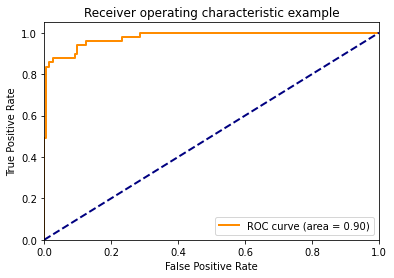

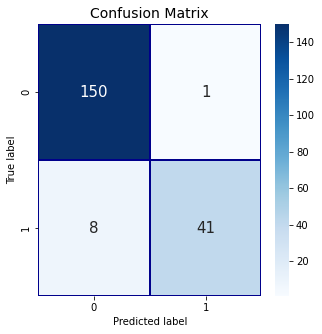

AUC: 0.97783484254629


In [151]:
import lightgbm as lgbm  # standard alias
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score,auc

lgb = lgbm.LGBMClassifier(
#     objective="multiclass",# ‘binary’or 'mutliclass'
    objective= 'binary',
    random_state=42,
    n_estimators=1000,
    boosting="gbdt",  # default histogram binning of LGBM
    #     device='gpu'  # uncomment to use GPU training
)
lgb.fit(
    X_train,y_train,
    eval_set=[(X_test, y_test)],
#     eval_metric="multi_logloss", 多分类时使用
    early_stopping_rounds=150,
    verbose=False,  # Disable logs
)

y_pred_train = lgb.predict(X_train)
y_pred = lgb.predict(X_test)
print("训练集得分：", lgb.score(X_train, y_train))
print("测试集得分：", lgb.score(X_test, y_test))
print('预测结果：',y_pred,'测试集：',y_test)

y_pred_proba = lgb.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1], pos_label=1)
#4.绘图
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
# plt.savefig('lgb_auc_roc.pdf')
plt.show()

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, annot=True,ax=ax, fmt='d',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            linewidths=.2,linecolor="Darkblue", cmap="Blues",annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

auc = auc(fpr,tpr)
print("AUC:",auc)
    
# loss = log_loss(y_test, preds)
# print(f"LightGBM logloss on the evaluation set: {log_loss(y_test, preds):.5f}")

### Adaboost分类

The accuracy of the train_Ada is: 0.9675
The accuracy of the test_Ada is: 0.91


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


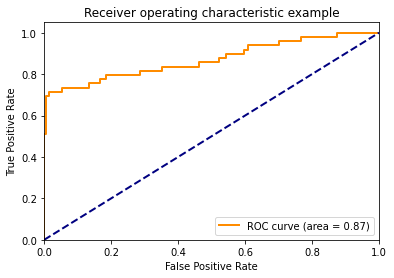

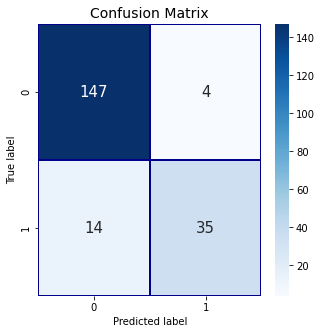

In [153]:
#1.调包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble
from sklearn.model_selection import train_test_split
#2.读数据
# df = pd.read_excel('./Caco-2_choosen.xlsx')
# X = df.drop(['Caco-2'], axis = 1)
# y = df['Caco-2']
#注意要将数据转换为numpy数值
# X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.2,random_state = 0)

#3.拟合模型
# 构建AdaBoost算法的类
AdaBoost1 = ensemble.AdaBoostClassifier()
# 算法在训练数据集上的拟合
AdaBoost1.fit(X_train,y_train)
# 算法在测试数据集上的预测
y_pred_train = AdaBoost1.predict(X_train)
y_pred = AdaBoost1.predict(X_test)
y_pred_proba = AdaBoost1.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1], pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
print('The accuracy of the train_Ada is:',metrics.accuracy_score(y_train,y_pred_train))
print('The accuracy of the test_Ada is:',metrics.accuracy_score(y_test,y_pred))
#4.绘图
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.savefig('auc_roc.pdf')
plt.show()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = y_pred 
y_test = y_test 
# 对上面进行赋值
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, annot=True,ax=ax, fmt='d',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            linewidths=.2,linecolor="Darkblue", cmap="Blues",annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Xgboost分类


The accuracy of the Xgboost is: 1.0
The accuracy of the Xgboost is: 0.97


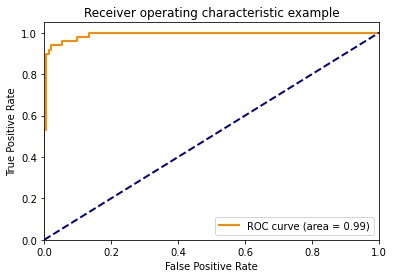

The confusion matrix result:
 [[150   5]
 [  1  44]]


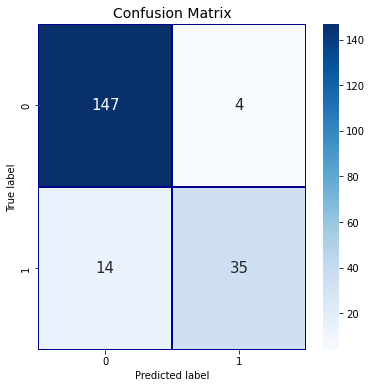

In [154]:
# 导入XGBoost模型
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
# 定义 XGBoost模型 
xgb = XGBClassifier()
xgb_clf = Pipeline([('imputer', SimpleImputer(strategy='median')), ('standardize', StandardScaler()), ('model', xgb)])
# xgb_clf = XGBClassifier(objective='multi:softproba',eval_metric = 'merror')
# 在训练集上训练XGBoost模型
xgb_clf.fit(X_train, y_train)

# 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = xgb_clf.predict(X_train)
test_predict = xgb_clf.predict(X_test)
from sklearn import metrics
print()

# 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Xgboost is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Xgboost is:',metrics.accuracy_score(y_test,test_predict))

y_pred_proba = xgb_clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1], pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
# 绘图
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.savefig('auc_roc.pdf')
plt.show()

# 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.show()
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(ncols=1, figsize=(6,6))
sns.heatmap(cm, annot=True,ax=ax, fmt='d',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            linewidths=.2,linecolor="Darkblue", cmap="Blues",annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [110]:
y_train[y_train.values == 3]

,weaptype1


### 决策树可视化&三分类

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
# 决策树建模
from sklearn import tree
dtr = tree.DecisionTreeClassifier(max_depth = 3)
dtr.fit(X_train, y_train)
# 可视化显示
dot_data = tree.export_graphviz(dtr, out_file=None)
dot_data_val = dot_data.replace('helvetica', 'MicrosoftYaHei')


import graphviz
graph = graphviz.Source(dot_data_val)
dot_data = tree.export_graphviz(dtr, out_file=None,
                      feature_names=feat_labels,  
                      class_names=['0','1'],  
                      filled=True, rounded=True,  
                      special_characters=True,
                      fontname="Microsoft YaHei")  
graph = graphviz.Source(dot_data)
graph.render("决策树1")
graph
#只显示sample和value的决策树
# import pydotplus
# graph = pydotplus.graph_from_dot_data(dot_data_val)
# graph.get_nodes()[7].set_fillcolor('#FFF2DD')
# from IPython.display import Image
# Image(graph.create_png())

IndexError: list index out of range

The accuracy of the train_DecisionTree is: 1.0
The accuracy of the test_DecisionTree is: 0.93


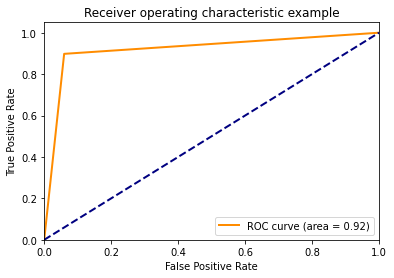

The confusion matrix result:
 [[142   5]
 [  9  44]]


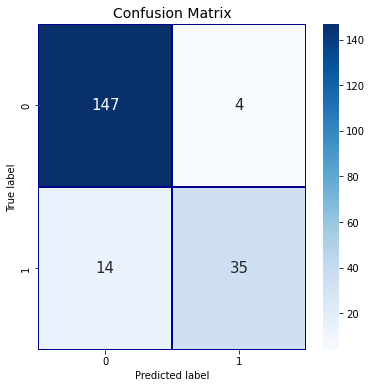

In [155]:
#决策树多分类训练与模拟
from sklearn.tree import  DecisionTreeClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
## 定义 决策树模型 
DTC = DecisionTreeClassifier()
DTC_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('standardize', StandardScaler()), ('model', DTC)])

# 在训练集上训练决策树模型
DTC_pipe.fit(X_train, y_train)
train_predict = DTC_pipe.predict(X_train)
test_predict = DTC_pipe.predict(X_test)
train_predict_proba = DTC_pipe.predict_proba(X_train)
test_predict_proba = DTC_pipe.predict_proba(X_test)
# print('The test predict Probability of each class:\n',test_predict_proba)
## 其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。
 
## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the train_DecisionTree is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the test_DecisionTree is:',metrics.accuracy_score(y_test,test_predict))

# 可视化
y_pred_proba = DTC_pipe.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1], pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
# 绘图
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
# plt.savefig('auc_roc.pdf')
plt.show()
 
## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
 
# 利用热力图对于结果进行可视化
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.show()
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(ncols=1, figsize=(6,6))
sns.heatmap(cm, annot=True,ax=ax, fmt='d',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            linewidths=.2,linecolor="Darkblue", cmap="Blues",annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 贝叶斯分类

The accuracy of the test_naive_bayes is: 0.265


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


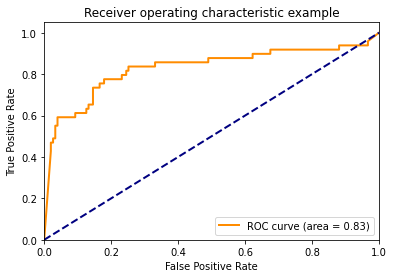

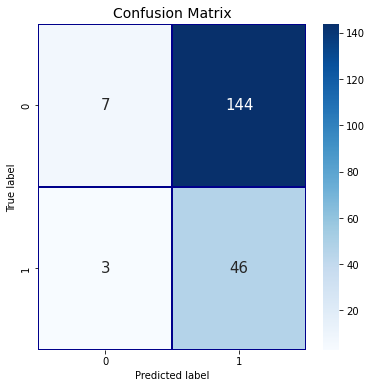

In [156]:
#高斯朴素贝叶斯  “分类问题 ”
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
GNB = GaussianNB()
GNB_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('standardize', StandardScaler()), ('model', GNB)])
GNB_pipe.fit(X_train, y_train)
y_pred = GNB_pipe.predict(X_test)
y_pred_proba = GNB_pipe.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1], pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
print('The accuracy of the test_naive_bayes is:',metrics.accuracy_score(y_test,y_pred))
#绘图
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
#plt.savefig('auc_roc.pdf')
plt.show()

# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]
# for title, normalize in titles_options:
#     disp = ConfusionMatrixDisplay.from_estimator(
#         rf_pipe,
#         X_test,
#         y_test,
#         display_labels=['0','1'],
#         cmap=plt.cm.Blues,
#         normalize=normalize,
#     )
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(ncols=1, figsize=(6,6))
sns.heatmap(cm, annot=True,ax=ax, fmt='d',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            linewidths=.2,linecolor="Darkblue", cmap="Blues",annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 神经网络分类

D:\software\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the test_neural_network is: 0.865


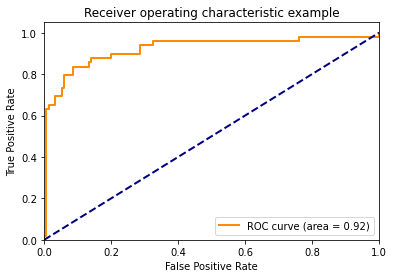

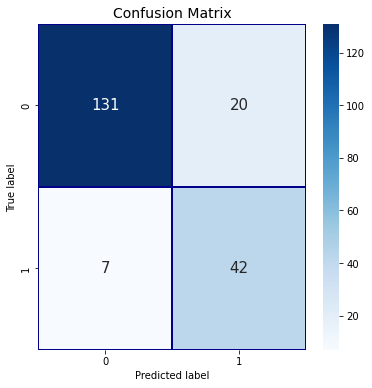

In [157]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# df = pd.read_excel('./Caco-2_choosen.xlsx')
# X = df.drop(['Caco-2'], axis = 1)
# y = df['Caco-2']
#注意要将数据转换为numpy数值
# X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.2,random_state = 0)
nn = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
nn.predict_proba(X_test)
y_pred = nn.predict(X_test)
y_pred_proba = nn.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1], pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
nn.score(X_test, y_test)
print('The accuracy of the test_neural_network is:',metrics.accuracy_score(y_test,y_pred))

#4.绘图
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.savefig('auc_roc.pdf')
plt.show()

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# 对上面进行赋值
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(ncols=1, figsize=(6,6))
sns.heatmap(cm, annot=True,ax=ax, fmt='d',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            linewidths=.2,linecolor="Darkblue", cmap="Blues",annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### KNN

In [56]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.metrics import roc_auc_score,auc
import matplotlib.pyplot as plt
# 将数据分为训练集和测试集，用来测试模型分类正确率
# train_set, test = train_test_split(deepcopy(data), test_size = 0.2, random_state = 42)

In [60]:
data = pd.read_csv('M2_Rknow.csv')

In [62]:
# 2.划分数据与标签
X, y = np.split(Kdata01, indices_or_sections=(Kdata01.shape[1]-1,), axis=1)  # x为数据，y为标签
feat_labels = X.columns
print(type(X),type(y))
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=0, train_size=0.8,test_size=0.2)
type(X_train)
y_train
X_train

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


,latitude,longitude,nperps,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,...,crit2,crit3,doubtterr,multiple,vicinity,success,suicide,guncertain1,claimed,INT_MISC
11,14.466344,75.923840,-99.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29,27.511410,41.720824,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27,32.069286,20.151144,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35,39.930771,32.767540,2.0,0.0,105.0,0.0,2.0,245.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
33,36.201721,37.143520,-99.0,0.0,2.0,0.0,0.0,13.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
28,32.069286,20.151144,-99.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32,36.201721,37.143520,-99.0,0.0,2.0,0.0,0.0,13.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,37.997490,23.762728,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,34.526179,74.254614,-99.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,-1.234836,29.445286,-99.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
D:\software\Anaconda\lib\site-packages\sklearn\mod

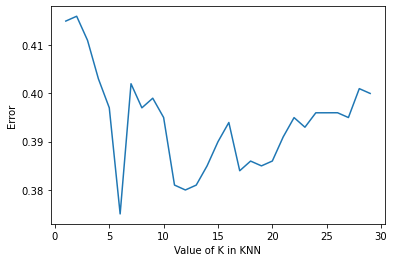

In [57]:
k_range = range(1, X.shape[1]-5) # 设置循环次数
k_error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights = 'distance',algorithm = 'kd_tree')
    #metric = 'mahalanobis',weights = 'distance',algorithm = 'kd_tree'
    #cv参数决定数据集划分比例，这里是按照5:1划分训练集和测试集
    scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
    k_error.append(1 - scores.mean())

#画图，x轴为k值，y值为误差值
plt.plot(k_range, k_error)
plt.xlabel('Value of K in KNN')
plt.ylabel('Error')
plt.show()

In [58]:
np.argmin(k_error)

5

In [65]:
k_proba = pd.DataFrame(np.zeros(X_test.shape[0]))
k_proba.iloc[1]

0    0.0
Name: 1, dtype: float64

D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy of the KNN is: 1.0
The accuracy of the KNN is: 0.855
The accuracy score of the test_KNN is: 0.865


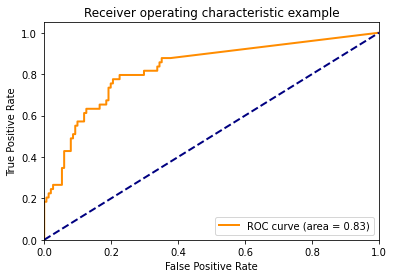

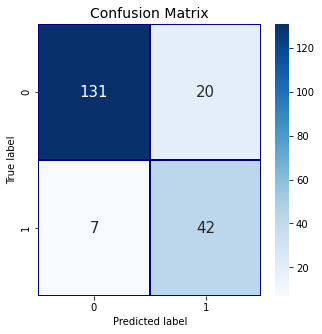

In [158]:
k = np.argmin(k_error)+1
# k = 12
knn = KNeighborsClassifier(n_neighbors=k,weights = 'distance')
knn = Pipeline([('imputer', SimpleImputer(strategy='median')), ('standardize', StandardScaler()), ('model', knn)])
knn.fit(X_train,y_train)
train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)
print('The accuracy of the KNN is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the KNN is:',metrics.accuracy_score(y_test,test_predict))
y_pred_proba = knn.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1], pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
knn.score(X_test, y_test)
print('The accuracy score of the test_KNN is:',metrics.accuracy_score(y_test,y_pred))
#4.绘图
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
# plt.savefig('auc_roc.pdf')
plt.show()

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, annot=True,ax=ax, fmt='d',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            linewidths=.2,linecolor="Darkblue", cmap="Blues",annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [68]:
Kdata_pred = pd.read_csv('M2_unknow04.csv')
# knn.predict_proba(X_test.iloc[281:282,:])
Kdata_pred = Kdata_pred.iloc[:,1:]
Kdata_pred

,latitude,longitude,nperps,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,...,crit2,crit3,doubtterr,multiple,vicinity,success,suicide,guncertain1,claimed,INT_MISC
0,35.402778,71.584167,-99,0,1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
1,34.417122,70.449593,6,1,4,0,4,10,0,0,...,1,1,0,0,0,1,1,0,1,0
2,34.591139,68.956940,4,4,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,31.467463,64.092445,-99,0,0,0,0,15,0,0,...,1,1,0,0,0,1,0,0,1,0
4,31.465149,44.024105,-99,0,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,36.201721,37.143520,-99,0,2,0,0,13,0,0,...,1,1,0,1,0,1,0,0,1,0
112,6.574426,101.201524,-99,0,1,0,0,2,0,0,...,1,1,0,0,0,1,0,0,0,0
113,39.930771,32.767540,2,0,105,0,2,245,0,0,...,1,1,0,0,0,1,1,0,0,0
114,38.500718,43.375591,1,0,2,0,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [69]:
uk_proba = pd.DataFrame(np.zeros((Kdata_pred.shape[0],2)))
for i in range(Kdata_pred.shape[0]):
#     if(knn.predict_proba(X_test.iloc[i:i+1,:]).max()<0.5):
    uk_proba.iloc[i,0] = knn.predict(Kdata_pred.iloc[i:i+1,:])
    uk_proba.iloc[i,1] = knn.predict_proba(Kdata_pred.iloc[i:i+1,:]).max()

In [70]:
uk_proba.columns = ['label','proba']
temp = Kdata_pred.join(uk_proba)
# temp.to_csv('M2_knn01.csv')
temp[temp.iloc[:,-1]>=0.7].iloc[:,:-1]
# temp

,latitude,longitude,nperps,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,...,crit3,doubtterr,multiple,vicinity,success,suicide,guncertain1,claimed,INT_MISC,label
7,24.047801,90.239010,-99,-99,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,488.0
8,24.065363,90.214963,-99,-99,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,488.0
14,8.386150,-72.597940,-99,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,489.0
19,-0.995997,29.444352,-99,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,490.0
21,-1.234836,29.445286,-99,0,4,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,490.0
33,37.997490,23.762728,-99,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,491.0
34,37.997490,23.762728,-99,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,491.0
35,37.997490,23.762728,-99,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,491.0
36,33.789497,75.103386,3,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,492.0
43,14.466344,75.923840,-99,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,484.0


In [71]:
# uk_pred = knn.predict(Kdata_pred)
print("准确率阈值：30%","测试集准确率：",metrics.accuracy_score(y_test,test_predict),"真实准确率>",0.3/metrics.accuracy_score(y_test,test_predict))

准确率阈值：30% 测试集准确率： 0.5 真实准确率> 0.6


In [72]:
uk_newdata = temp[temp.iloc[:,-1]>=0.7].iloc[:,:-1]
uk_newdata

,latitude,longitude,nperps,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,...,crit3,doubtterr,multiple,vicinity,success,suicide,guncertain1,claimed,INT_MISC,label
7,24.047801,90.239010,-99,-99,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,488.0
8,24.065363,90.214963,-99,-99,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,488.0
14,8.386150,-72.597940,-99,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,489.0
19,-0.995997,29.444352,-99,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,490.0
21,-1.234836,29.445286,-99,0,4,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,490.0
33,37.997490,23.762728,-99,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,491.0
34,37.997490,23.762728,-99,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,491.0
35,37.997490,23.762728,-99,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,491.0
36,33.789497,75.103386,3,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,492.0
43,14.466344,75.923840,-99,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,484.0


In [404]:
uk_val = temp[temp.iloc[:,-1]<0.7].iloc[:,:-2]
print('剩余尚未标识的数据',uk_val)

剩余尚未标识的数据       latitude  longitude  nperps  nperpcap  nkill  nkillus  nkillter  nwound  \
0    35.402778  71.584167     -99         0      1        0         0       1   
1    34.417122  70.449593       6         1      4        0         4      10   
2    34.591139  68.956940       4         4      0        0         0       0   
4    31.465149  44.024105     -99         0      1        0         0       0   
6    21.983139  92.499624      10         0      1        0         0       0   
..         ...        ...     ...       ...    ...      ...       ...     ...   
108  35.291439  36.748001     -99         0      0        0         0       0   
109  36.201721  37.143520     -99         0      2        0         0      13   
110  36.201721  37.143520     -99         0      2        0         0      13   
111  36.201721  37.143520     -99         0      2        0         0      13   
113  39.930771  32.767540       2         0    105        0         2     245   

     nwoundus  nw

In [405]:
un_data = Kdata01.iloc[:,:].append(uk_newdata)
# un_data = uX.append(uk_newdata)
un_data

,latitude,longitude,nperps,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,...,crit3,doubtterr,multiple,vicinity,success,suicide,guncertain1,claimed,INT_MISC,label
0,35.029167,69.363056,-99,0,1,0,0,3,0,0,...,1,0,0,0,0,0,0,1,0,429.0
1,31.997362,63.298670,-99,0,5,0,3,1,0,0,...,1,0,0,0,1,0,0,1,0,429.0
2,37.110345,68.849843,-99,0,6,0,3,1,0,0,...,1,0,0,0,1,0,0,1,0,429.0
3,34.942699,69.262517,-99,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,429.0
4,33.914076,68.656837,-99,0,4,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,36.201721,37.143520,-99,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,194.0
104,36.201721,37.143520,-99,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,194.0
112,6.574426,101.201524,-99,0,1,0,0,2,0,0,...,1,0,0,0,1,0,0,0,0,385.0
114,38.500718,43.375591,1,0,2,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,244.0


In [406]:
un_data.to_csv('M2_know05.csv')

In [407]:
uk_val.to_csv('M2_unknow05.csv')

In [419]:
# un_adata = temp[temp.iloc[:,-1]<0.7].iloc[:,:]
un_adata.to_csv('M2_All_unknow.csv')

In [15]:
# 真实预测概率<30%共99个样本
# 将已被归为一类的且个数超过或等于3的且概率>20%,作为新的一类，作为新的训练集，其余则作为测试集。
# 标识36个样本,7:187,491/4:87:484,297,490/3:35:485,111:486,148:487,170:488,184:489,359:492,392:493,424:494
# 真实准确率>30%/测试集准确率才认为分类正确

1.0

### RKNN

In [73]:
# pd.merge(uX_val,uk_proba)
uk_proba.columns = ['label','proba']
uk_proba

,label,proba
0,485.0,0.216941
1,492.0,0.154446
2,492.0,0.250719
3,487.0,0.108355
4,494.0,0.326818
...,...,...
111,487.0,3.000000
112,486.0,0.100458
113,494.0,1.000000
114,494.0,0.105345


In [74]:
# temp = uk_val.join(uk_proba)
uk_newdata = temp[temp.iloc[:,-1]>=(0.3)].iloc[:,:-1]
print('本次标识的数据',uk_newdata)
temp

本次标识的数据       latitude  longitude  nperps  nperpcap  nkill  nkillus  nkillter  nwound  \
4    31.465149  44.024105     -99         0      1        0         0       0   
7    24.047801  90.239010     -99       -99      0        0         0       0   
8    24.065363  90.214963     -99       -99      0        0         0       0   
14    8.386150 -72.597940     -99         0      0        0         0       0   
17   -0.424976  29.191776     -99         0      5        0         0       0   
19   -0.995997  29.444352     -99         0      0        0         0       0   
20   -0.757161  29.293177     -99         0      1        0         0       0   
21   -1.234836  29.445286     -99         0      4        0         0       0   
23   -0.791773  29.045993     -99         0      6        0         0       2   
33   37.997490  23.762728     -99         0      0        0         0       0   
34   37.997490  23.762728     -99         0      0        0         0       0   
35   37.997490  23.7

,latitude,longitude,nperps,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,...,doubtterr,multiple,vicinity,success,suicide,guncertain1,claimed,INT_MISC,label,proba
0,35.402778,71.584167,-99,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,485.0,0.216941
1,34.417122,70.449593,6,1,4,0,4,10,0,0,...,0,0,0,1,1,0,1,0,492.0,0.154446
2,34.591139,68.956940,4,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,492.0,0.250719
3,31.467463,64.092445,-99,0,0,0,0,15,0,0,...,0,0,0,1,0,0,1,0,487.0,0.108355
4,31.465149,44.024105,-99,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,494.0,0.326818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,36.201721,37.143520,-99,0,2,0,0,13,0,0,...,0,1,0,1,0,0,1,0,487.0,3.000000
112,6.574426,101.201524,-99,0,1,0,0,2,0,0,...,0,0,0,1,0,0,0,0,486.0,0.100458
113,39.930771,32.767540,2,0,105,0,2,245,0,0,...,0,0,0,1,1,0,0,0,494.0,1.000000
114,38.500718,43.375591,1,0,2,0,1,1,0,0,...,0,0,0,1,0,0,0,0,494.0,0.105345


In [212]:
uk_val = temp[temp.iloc[:,-1]<(0.3/metrics.accuracy_score(uy_test,test_predict))].iloc[:,:-2]
print('剩余尚未标识的数据',uk_val)

剩余尚未标识的数据      latitude  longitude  nperps  nperpcap  nkill  nkillus  nkillter  nwound  \
3   21.983139  92.499624      10         0      1        0         0       0   
4   -3.375828  29.364107       1         0      1        0         0       0   
12  24.798346  93.940430     -99         0      0        0         0       0   
15  24.869637  93.806072     -99         0      1        0         0       0   
16  24.954357  93.923465       8         8      2        0         0       1   
17  24.211913  94.104948      23         1     20        0         2      11   
18  24.383788  94.148169     -99         0      3        0         0       1   
19  24.663717  93.906269     -99         0      0        0         0       0   
20  25.862989  93.753666     -99         0      1        0         1       0   
22  24.798346  93.940430     -99         0      0        0         0       1   
23  26.401436  90.266699       6         0     15        0         1      25   
24  24.798346  93.940430     -

In [215]:
un_data = un_data.append(uk_newdata)
# un_data = uX.append(uk_newdata)
print('总的已标识数据',un_data)

总的已标识数据      latitude  longitude  nperps  nperpcap  nkill  nkillus  nkillter  nwound  \
0   25.571734  89.275942     -99         8      6        0         0       8   
1   23.791275  90.418205       6         2      1        0         0       0   
2   22.341896  91.815117     -99         2      3        0         0       0   
3   25.750411  89.254366     -99         0      0        0         0       1   
4   23.544987  89.172603       3         0      1        0         0       0   
..        ...        ...     ...       ...    ...      ...       ...     ...   
57  32.959034 -96.641877       2         0      2        2         2       1   
58  32.137933 -95.323685       1         1      0        0         0       0   
59  28.519601 -81.376794       1         0     50       44         1      53   
60  32.779578 -96.804259       1         0      6        6         1       9   
61  14.536389  46.833056     -99         0      1        0         0       0   

    nwoundus  nwoundte  ...  cr

In [203]:
un_data = Kundata.iloc[:,4:].append(uk_newdata)

In [204]:
# 2.划分数据与标签
uX, uy = np.split(un_data, indices_or_sections=(un_data.shape[1]-1,), axis=1)  # x为数据，y为标签
feat_labels = un_data.columns
# print(type(X),type(y))
uX_train, uX_test, uy_train, uy_test = \
    train_test_split(uX, uy, random_state=0, train_size=0.8,test_size=0.2)
type(uX_train)

pandas.core.frame.DataFrame

D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=6.
  warnings.warn(
D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\software\Anaconda\lib\si

D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=6.
  warnings.warn(
D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\software\Anaconda\lib\si

D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=6.
  warnings.warn(
D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\software\Anaconda\lib\si

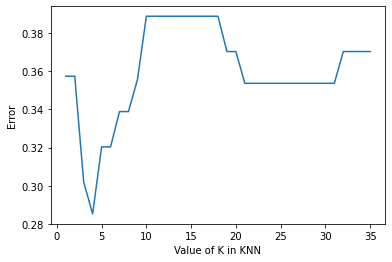

In [205]:
k_range = range(1, (un_data.shape[1]-1)) # 设置循环次数
k_error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights = 'distance',algorithm = 'kd_tree')
    #metric = 'mahalanobis',weights = 'distance',algorithm = 'kd_tree'
    #cv参数决定数据集划分比例，这里是按照5:1划分训练集和测试集
    scores = cross_val_score(knn, uX, uy, cv=6, scoring='accuracy')
    k_error.append(1 - scores.mean())

#画图，x轴为k值，y值为误差值
plt.plot(k_range, k_error)
plt.xlabel('Value of K in KNN')
plt.ylabel('Error')
plt.show()

In [206]:
k = np.argmin(k_error)+1
# k = 3
print(k)
knn = KNeighborsClassifier(n_neighbors=k,weights = 'distance')
knn.fit(uX_train,uy_train)
train_predict = knn.predict(uX_train)
test_predict = knn.predict(uX_test)
print('The accuracy of the train_KNN is:',metrics.accuracy_score(uy_train,train_predict))
print('The accuracy of the test_KNN is:',metrics.accuracy_score(uy_test,test_predict))

4
The accuracy of the train_KNN is: 1.0
The accuracy of the test_KNN is: 0.6666666666666666


D:\software\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [207]:
uk_proba = pd.DataFrame(np.zeros((uk_val.shape[0],2)))
for i in range(uk_val.shape[0]):
#     if(knn.predict_proba(X_test.iloc[i:i+1,:]).max()<0.5):
    uk_proba.iloc[i,0] = knn.predict(uk_val.iloc[i:i+1,:])
    uk_proba.iloc[i,1] = knn.predict_proba(uk_val.iloc[i:i+1,:]).max()

In [208]:
print("准确率阈值：30%","测试集准确率：",metrics.accuracy_score(uy_test,test_predict),"真实准确率>",0.3/metrics.accuracy_score(uy_test,test_predict))
print(temp[temp.iloc[:,-1]>=(0.3/metrics.accuracy_score(uy_test,test_predict))].iloc[:,-2:])

准确率阈值：30% 测试集准确率： 0.6666666666666666 真实准确率> 0.45
    label     proba
0   491.0  0.764197
1   492.0  0.735245
2   489.0  0.644099
5   491.0  0.936264
6   491.0  0.722729
7   491.0  0.839203
8   486.0  0.580688
9   486.0  0.551567
10  491.0  0.840671
11  491.0  0.832563
13  489.0  0.613666
14  489.0  0.741550
21  487.0  0.513073
25  488.0  0.543847
28  491.0  0.902036
29  491.0  0.796078
30  491.0  0.755064
31  491.0  0.756844
32  491.0  0.749066
33  491.0  0.747948
34  490.0  0.685960
37  492.0  0.739598
38  485.0  0.612916
39  489.0  0.554759
41  484.0  1.000000
42  484.0  1.000000
43  484.0  1.000000
44  484.0  1.000000
45  485.0  0.629847
46  484.0  1.000000
47  491.0  0.798694
49  491.0  0.703255
50  486.0  0.626448
51  491.0  0.950148
52  490.0  0.733268
53  491.0  0.829870
54  486.0  1.000000
55  486.0  1.000000
56  490.0  0.905162
57  490.0  1.000000
58  490.0  1.000000
59  490.0  1.000000
60  490.0  1.000000
61  491.0  0.711268


In [216]:
un_data.to_excel('M2_unknow.xlsx')

### 分类集成硬投票

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
# 在平局的情况下,投票分类器（VotingClassifier）将根据升序排序顺序选择类标签。
# 所以按照强→弱的顺序放分类器效果会更好？
lgb = lgbm.LGBMClassifier(
    objective="binary",# or 'mutliclass'
    random_state=42,
    n_estimators=1000,
    boosting="gbdt",  # default histogram binning of LGBM
    #     device='gpu'  # uncomment to use GPU training
)
AdaBoost1 = ensemble.AdaBoostClassifier()
xgb_clf = XGBClassifier()
eclf = VotingClassifier(estimators=[('Xgboost', xgb_clf), ('ligtGBM',lgb) , ('Ada', AdaBoost1)], voting='hard')

for clf, label in zip([xgb_clf, lgb, AdaBoost1, eclf], ['Xgboost', 'ligtGBM', 'Ada', 'Ensemble']):
     scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.76 (+/- 0.07) [Xgboost]
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


D:\software\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


### 集成软投票

In [118]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('Xgboost', xgb_clf), ('lightGBM',lgb), ('Ada', AdaBoost1)],
                         voting='soft', weights=[4, 3, 1])
# for clf, label in zip([xgb_clf, lgb, AdaBoost1, eclf], ['Xgboost', 'lightGBM', 'Ada', 'Ensemble']):
#      scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
#      print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label)) 

### 机器学习集成

In [132]:
import numpy as np
from sklearn.model_selection import KFold
def get_stacking(clf, x_train, y_train, x_test, n_folds=10):
    """
    这个函数是stacking的核心，使用交叉验证的方法得到次级训练集
    x_train, y_train, x_test 的值应该为numpy里面的数组类型 numpy.ndarray .
    如果输入为pandas的DataFrame类型则会把报错
    """
    train_num, test_num = x_train.shape[0], x_test.shape[0]
    second_level_train_set = np.zeros((train_num,))
    second_level_test_set = np.zeros((test_num,))
    test_nfolds_sets = np.zeros((test_num, n_folds))
    kf = KFold(n_splits=n_folds)

    for i,(train_index, test_index) in enumerate(kf.split(x_train)):
        x_tra, y_tra = x_train[train_index], y_train[train_index]
        x_tst, y_tst =  x_train[test_index], y_train[test_index]

        clf.fit(x_tra, y_tra)

        second_level_train_set[test_index] = clf.predict(x_tst)
        test_nfolds_sets[:,i] = clf.predict(x_test)

    second_level_test_set[:] = test_nfolds_sets.mean(axis=1)
    return second_level_train_set, second_level_test_set



#我们这里使用5个分类算法，为了体现stacking的思想，就不加参数了
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC

rf_model = RandomForestClassifier()
adb_model = AdaBoostClassifier()
gdbc_model = GradientBoostingClassifier()
et_model = ExtraTreesClassifier()
svc_model = SVC()

#在这里我们使用train_test_split来人为的制造一些数据
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
train_x, test_x, train_y, test_y = train_test_split(iris.data, iris.target, test_size=0.2)

train_sets = []
test_sets = []
for clf in [rf_model, adb_model, gdbc_model, et_model, svc_model]:
    train_set, test_set = get_stacking(clf, X_train, y_test, X_test)
    train_sets.append(train_set)
    test_sets.append(test_set)

meta_train = np.concatenate([result_set.reshape(-1,1) for result_set in train_sets], axis=1)
meta_test = np.concatenate([y_test_set.reshape(-1,1) for y_test_set in test_sets], axis=1)
print('meta_train:',meta_train,'meta_test:',meta_test)
#使用决策树作为我们的次级分类器
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(meta_train, train_y)
df_predict = dt_model.predict(meta_test)

print(df_predict == test_y)

KeyError: "None of [Int64Index([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,\n            ...\n            790, 791, 792, 793, 794, 795, 796, 797, 798, 799],\n           dtype='int64', length=720)] are in the [columns]"

In [115]:
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
import numpy as np
#对于分类问题可以使用 ClassifierMixin


class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    # 我们将原来的模型clone出来，并且进行实现fit功能
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        #对于每个模型，使用交叉验证的方法来训练初级学习器，并且得到次级训练集
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                self.base_models_[i].append(instance)
                instance = clone(model)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        # 使用次级训练集来训练次级学习器
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    #在上面的fit方法当中，我们已经将我们训练出来的初级学习器和次级学习器保存下来了
    #predict的时候只需要用这些学习器构造我们的次级预测数据集并且进行预测就可以了
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

## 回归算法

In [169]:
# 1.读取数据集
data01 = pd.read_excel('test01.xlsx')

In [171]:
data = data01.iloc[:1000,:]
data

,nC,ATSc3,BCUTc-1l,C1SP2,VC-5,SHBint10,SHsOH,minHBint5,minHsOH,minsssN,...,maxHsOH,maxssO,LipoaffinityIndex,nHBAcc,MLogP,MDEC-23,MDEO-12,MLFER_A,TopoPSA,pIC50
0,26,-0.126453,-0.360525,0,0.230311,0.000000,0.469126,3.092949,0.469126,2.516142,...,0.469126,6.593009,11.830949,1,3.77,28.277932,0.269680,0.546,67.23,8.602060
1,28,-0.126453,-0.360530,0,0.230311,0.000000,0.449126,2.997752,0.449126,2.521244,...,0.449126,6.674642,13.149974,1,3.99,31.076748,0.269680,0.546,67.23,8.124939
2,27,-0.143126,-0.361379,0,0.174055,9.842059,0.997247,3.125957,0.480713,2.484448,...,0.516534,6.502751,10.577177,1,3.77,30.901064,0.495846,1.089,87.46,8.508638
3,28,-0.126504,-0.360530,0,0.123273,0.000000,0.456486,3.022916,0.456486,2.519774,...,0.456486,6.622142,13.212767,1,3.99,30.570001,0.269680,0.546,67.23,8.408935
4,28,-0.128690,-0.360530,0,0.123273,0.000000,0.473631,3.103616,0.473631,2.504217,...,0.473631,6.552810,12.489691,1,3.99,30.570001,0.269680,0.546,67.23,8.130768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,0.193239,-0.272655,1,0.053519,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,12.854441,4,3.66,22.593415,0.000000,0.391,49.84,5.677781
996,23,0.205821,-0.268530,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,11.736846,4,3.55,19.303957,0.000000,0.391,49.84,5.080922
997,17,0.193598,-0.272633,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.644081,4,2.89,9.591527,0.000000,0.391,49.84,5.508638
998,14,0.192837,-0.272884,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.590013,4,2.56,7.907600,0.000000,0.391,49.84,4.886057


In [172]:
# 2.划分数据与标签
X, y = np.split(data, indices_or_sections=(20,), axis=1)  # x为数据，y为标签
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=0, train_size=0.8,test_size=0.2)

In [173]:
#标准化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
y_test = min_max_scaler.fit_transform(y_test)
y_train = min_max_scaler.fit_transform(y_train)

### 随机森林回归

D:\software\Anaconda\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Mean Absolute Error: 0.08830837716724252
Mean Squared Error: 0.0142261625352883
Root Mean Squared Error: 0.11927347792065217


Text(0.5, 1.0, 'Test Data')

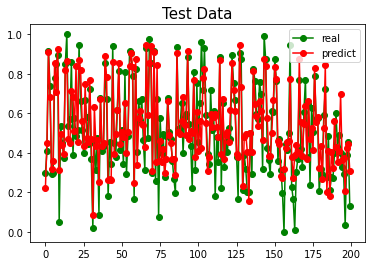

In [174]:
#随机森林做 “回归预测”   评价指标————MAE、MSE、RMSE   ！！！缺少可视化！！！
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#模型训练
rf = RandomForestRegressor(n_estimators=1000, random_state=0,max_depth=None)
rf_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('standardize', StandardScaler()), ('rf', rf)])
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)

#评估模型性能
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#绘图
plt.plot(np.arange(len(y_pred)),y_test,'go-')#,label = 'true value'
plt.plot(np.arange(len(y_pred)),y_pred,'ro-')#,label = 'predict value'
plt.legend(('real', 'predict'),loc='upper right',fontsize='10')
plt.title("Test Data",fontsize='15') #添加标题

### SVM支持向量机回归

Mean Absolute Error: 0.110284726377808
Mean Squared Error: 0.022453255744004478
Root Mean Squared Error: 0.14984410480230603


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Test Data')

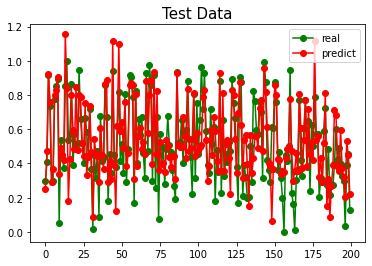

In [176]:
#encoding=utf8
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
# 1.读取数据集
# data = pd.read_excel('test01.xlsx')
# 2.划分数据与标签

# x, y = np.split(data, indices_or_sections=(20,), axis=1)  # x为数据，y为标签
# X_train, X_test, y_train, y_test = \
#     train_test_split(x, y, random_state=0, train_size=0.8,test_size=0.2)
#print(x,y)
#print(y_train,y_test)
def svr_predict(X_train,y_train,X_test):
    '''
    input:train_data(ndarray):训练数据
          train_label(ndarray):训练标签
    output:predict(ndarray):测试集预测标签
    '''
    #********* Begin *********#
    svr = SVR(kernel='rbf',C=100,gamma= 0.001,epsilon=0.1)
    svr.fit(X_train,y_train)
    y_pred = svr.predict(X_test)
    return y_pred
y_pred = svr_predict(X_train,y_train,X_test)
# print(y_test.T-y_pred)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#绘图
plt.plot(np.arange(len(y_pred)),y_test,'go-')#,label = 'true value'
plt.plot(np.arange(len(y_pred)),y_pred,'ro-')#,label = 'predict value'
plt.legend(('real', 'predict'),loc='upper right',fontsize='10')
plt.title("Test Data",fontsize='15') #添加标题

### lightGBM回归

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3019
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] Start training from score 0.514563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

D:\software\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
D:\software\Anaconda\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Text(0.5, 1.0, 'Test Data')

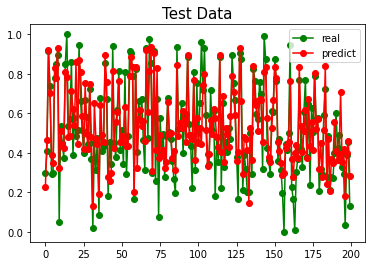

In [177]:
#lightGBM回归
#loading the Boston Dataset
#train_test_split
import lightgbm as lgb
# # 1.读取数据集
# data = pd.read_excel('test01.xlsx')
# # 2.划分数据与标签
# #2.1 纯预测版
# x, y = np.split(data, indices_or_sections=(20,), axis=1)  # x为数据，y为标签
# X_train, X_test, y_train, y_test = \
#     train_test_split(x, y, random_state=0, train_size=0.8,test_size=0.2)
# #2.2 填写预测值版
# testSet = pd.read_excel('testSet.xlsx')
# test_X,test_y = np.split(testSet, indices_or_sections=(20,), axis=1)
#标准化
#seiers--values.reshape(-1,1)
# min_max_scaler = preprocessing.MinMaxScaler()
# y_test = min_max_scaler.fit_transform(y_test)
# y_train = min_max_scaler.fit_transform(y_train)
#Converting the data into proper LGB Dataset Format
d_train=lgb.Dataset(X_train, label=y_train)
#Declaring the parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='regression'#regression task
params['n_estimators']=100
params['max_depth']=10
#model creation and training
clf=lgb.train(params,d_train,100)
#model prediction on X_test
y_pred=clf.predict(X_test)
#using RMSE error metric
mean_squared_error(y_pred,y_test)
# 0.9672167056074766
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# 画图
plt.plot(np.arange(len(y_pred)),y_test,'go-')#,label = 'true value'
plt.plot(np.arange(len(y_pred)),y_pred,'ro-')#,label = 'predict value'
plt.legend(('real', 'predict'),loc='upper right',fontsize='10')
plt.title("Test Data",fontsize='15') #添加标题
#2.2 输出需填写预测值
#print(test_X)
#test_y= clf.predict(test_X)
#print(test_y.reshape(-1,1))
#testSet['pIC50'] = test_y.reshape(-1,1)
#testSet.to_excel('testSet03.xlsx')

### Adaboost回归

Mean Absolute Error: 0.11225312169024945
Mean Squared Error: 0.018947839095660023
Root Mean Squared Error: 0.13765114999759365


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Test Data')

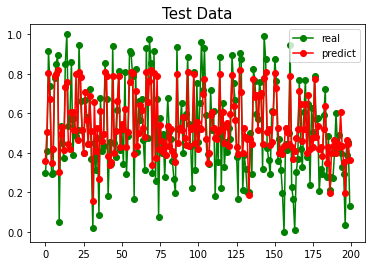

In [178]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn import preprocessing
#df = pd.read_excel('./M2Set.xlsx')
# X = df.drop(['pIC50'], axis = 1)
# y = df['pIC50']
# X, y = np.split(df, indices_or_sections=(20,), axis=1)  # x为数据，y为标签
#注意要将数据转换为numpy数值
# X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.2,random_state = 0)
# min_max_scaler = preprocessing.MinMaxScaler()
# y_test = min_max_scaler.fit_transform(y_test)
# y_train = min_max_scaler.fit_transform(y_train)
# X_train = min_max_scaler.fit_transform(X_train)
# X_test = min_max_scaler.fit_transform(X_test)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
# print(X_train,y_train)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.plot(np.arange(len(y_pred)),y_test,'go-')#,label = 'true value'
plt.plot(np.arange(len(y_pred)),y_pred,'ro-')#,label = 'predict value'
plt.legend(('real', 'predict'),loc='upper right',fontsize='10')
plt.title("Test Data",fontsize='15') #添加标题
#regr.score(X_train, y_train)

### Xgboost回归

In [179]:
#coding:utf-8
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error  
#标准化
# min_max_scaler = preprocessing.MinMaxScaler()
# y_test = min_max_scaler.fit_transform(y_test)
# y_train = min_max_scaler.fit_transform(y_train)
#2.参数集定义
param_grid = {
            'max_depth': [2, 3, 4, 5, 6, 7, 8],
            'n_estimators': [30, 50, 100, 300, 500, 1000,2000],
            'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.01, 0.02, 0.03, 0.05, 0.5],
            "gamma":[0.0, 0.1, 0.2, 0.3, 0.4],
            "reg_alpha":[0.0001,0.001, 0.01, 0.1, 1, 100],
            "reg_lambda":[0.0001,0.001, 0.01, 0.1, 1, 100],
            "min_child_weight": [2,3,4,5,6,7,8],
            "colsample_bytree": [0.6, 0.7, 0.8, 0.9],
            "subsample":[0.6, 0.7, 0.8, 0.9]}
#3.随机搜索并打印最佳参数
gsearch1 = RandomizedSearchCV(XGBRegressor(scoring='ls',seed=27), param_grid, cv=5)
gsearch1.fit(X_train, y_train)
print("best_score_:",gsearch1.best_params_,gsearch1.best_score_)

[17:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scoring" } might not be used.

  This could be a fa

[17:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scoring" } might not be used.

  This could be a fa

[17:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scoring" } might not be used.

  This could be a fa

Mean Absolute Error: 0.0856485436468824
Mean Squared Error: 0.013734637555367047
Root Mean Squared Error: 0.11719487000448034


Text(0.5, 1.0, 'Test Data')

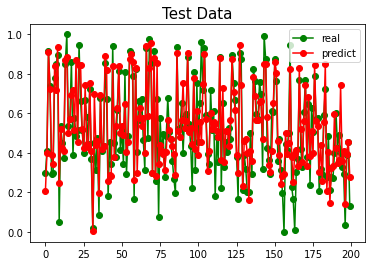

In [180]:
#4.用最佳参数进行预测
y_pred= gsearch1.predict(X_test)

#5.打印测试集RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# 画图
plt.plot(np.arange(len(y_pred)),y_test,'go-')#,label = 'true value'
plt.plot(np.arange(len(y_pred)),y_pred,'ro-')#,label = 'predict value'
plt.legend(('real', 'predict'),loc='upper right',fontsize='10')
plt.title("Test Data",fontsize='15') #添加标题

In [181]:
## 没有调参的Xgboost回归
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=1898)
xgb_model.fit(X_train, y_train)
## 完整数据：评估训练模型
y_pred = xgb_model.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
print(np.sqrt(mse)) 
## 完整数据：评估测试模型
y_pred = xgb_model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print(np.sqrt(mse)) 

0.021043166536386906
0.11899165156596016


### 神经网络

D:\software\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 0.1368451605451839
Mean Squared Error: 0.031550961815962134
Root Mean Squared Error: 0.17762590412426374


Text(0.5, 1.0, 'Test Data')

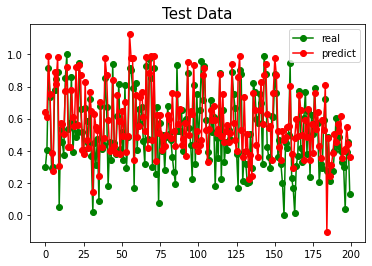

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
#df = pd.read_excel('./M2Set.xlsx')
#X = df.drop(['pIC50'], axis = 1)
#y = df['pIC50']
#注意要将数据转换为numpy数值
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 0)
# min_max_scaler = preprocessing.MinMaxScaler()
# y_test = min_max_scaler.fit_transform(y_test)#变成一行
# print(y_test.shape)
# print(y_test.reshape(1,-1).shape)
# y_train = min_max_scaler.fit_transform(y_train)
# X_train = min_max_scaler.fit_transform(X_train)
# X_test = min_max_scaler.fit_transform(X_test)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.plot(np.arange(len(y_pred)),y_test,'go-')#,label = 'true value'
plt.plot(np.arange(len(y_pred)),y_pred,'ro-')#,label = 'predict value'
plt.legend(('real', 'predict'),loc='upper right',fontsize='10')
plt.title("Test Data",fontsize='15') #添加标题
#regr.score(X_test, y_test)

### 回归问题评估方法

## 优化算法

### 粒子群算法(改后逻辑存在问题，导致优化相反）

In [15]:
import numpy as np
from functools import lru_cache
from types import MethodType, FunctionType
import warnings
import pandas as pd
import sys

In [37]:
# 一般无需修改
def func_transformer(func):
    if (func.__class__ is FunctionType) and (func.__code__.co_argcount > 1):
        warnings.warn('multi-input might be deprecated in the future, use fun(p) instead')
        def func_transformed(X):
            return np.array([func(*tuple(x)) for x in X])
        return func_transformed

    if (func.__class__ is MethodType) and (func.__code__.co_argcount > 2):
        warnings.warn('multi-input might be deprecated in the future, use fun(p) instead')

        def func_transformed(X):
            return np.array([func(tuple(x)) for x in X])
        return func_transformed

    if getattr(func, 'is_vector', False):
        warnings.warn('''
        func.is_vector will be deprecated in the future, use set_run_mode(func, 'vectorization') instead
        ''')
        set_run_mode(func, 'vectorization')

    mode = getattr(func, 'mode', 'others')
    valid_mode = ('common', 'multithreading', 'multiprocessing', 'vectorization', 'cached', 'others')
    assert mode in valid_mode, 'valid mode should be in ' + str(valid_mode)
    if mode == 'vectorization':
        return func
    elif mode == 'cached':
        @lru_cache(maxsize=None)

        def func_cached(x):
            return func(x)

        def func_warped(X):
            return np.array([func_cached(tuple(x)) for x in X])

        return func_warped

    elif mode == 'multithreading':
        from multiprocessing.dummy import Pool as ThreadPool
        pool = ThreadPool()
        def func_transformed(X):
            return np.array(pool.map(func, X))
        return func_transformed
    elif mode == 'multiprocessing':
        from multiprocessing import Pool

        pool = Pool()
        def func_transformed(X):
            return np.array(pool.map(func, X))
        return func_transformed
    else: # common
        def func_transformed(X):
#             for x in X:
#                 print("tuple(x):",X[x],"type:",type(x))
#                 print(x)
#             func(tuple(X[i,:]) for i in range(X.shape[0]))
#             temp01 = np.array([func(tuple(x) for x in X)])
            return np.array(func(X))
        return func_transformed

In [17]:
from abc import ABCMeta, abstractmethod
import types
import warnings
class SkoBase(metaclass=ABCMeta):
    def register(self, operator_name, operator, *args, **kwargs):
        def operator_wapper(*wrapper_args):
            return operator(*(wrapper_args + args), **kwargs)
        setattr(self, operator_name, types.MethodType(operator_wapper, self))
        return self
    def fit(self, *args, **kwargs):
        warnings.warn('.fit() will be deprecated in the future. use .run() instead.', DeprecationWarning)
        return self.run(*args, **kwargs)
class Problem(object):
    pass

In [ ]:
class PSO(SkoBase):
    yindex = 0
    def __init__(self,chushi_pop, n_dim=None, pop=40, max_iter=150, lb=-1e5, ub=1e5, w=0.8,c1=0.5, c2=0.5,constraint_eq=tuple(), verbose=False, dim=None,yindex = 0):
        n_dim = n_dim or dim # support the earlier version
#         self.func = func_transform(self.func)
        self.w = w # inertia
        self.cp, self.cg = c1, c2 # parameters to control personal best, global best respectively
        self.pop = pop # number of particles
        self.n_dim = n_dim # dimension of particles, which is the number of variables of func

        self.max_iter = max_iter # max iter
        self.verbose = verbose # print the result of each iter or not
#         print("np.array(lb)",type(np.array(lb))*np.ones(self.n_dim),np.array(ub)*np.ones(self.n_dim))
        self.lb, self.ub = np.array(lb) * np.ones(self.n_dim), np.array(ub) * np.ones(self.n_dim)
        assert self.n_dim == len(self.lb) == len(self.ub), 'dim == len(lb) == len(ub) is not True'
        assert np.all(self.ub > self.lb), 'upper-bound must be greater than lower-bound'
#         self.has_constraint = bool(self.constraint_ueq)
#         self.constraint_ueq = self.constraint_ueq
        self.is_feasible = np.array([True] * pop)
#         self.X = np.vstack((chushi_pop,np.random.uniform(low=self.lb, high=self.ub, size=(self.pop -chushi_np.shape[0], self.n_dim))))
        self.X = chushi_pop
#         print('self.X.shape[1]:',self.X.shape[1])
#         for i in range(self.X.shape[1]):
#             if data_type[:,i]== 1:
#                 self.X[:,i] = self.X[:,i].astype(np.int64)
#         print("self.X.shape:",self.X.shape)
        v_high = self.ub - self.lb
        np.random.seed(42)
        self.V = np.random.uniform(low=-v_high, high=v_high, size=(self.pop, self.n_dim)) # speed of particles
#         print('self.cal_y():',self.cal_y())
        self.Y = self.cal_y() # y = f(x) for all particles
        self.pbest_x = self.X.copy() # personal best location of every particle in history
        self.pbest_y = np.array([[np.inf]] * pop) # best image of every particle in history
#         self.gbest_x = self.pbest_x.mean(axis=0).reshape(1, -1) # global best location for all particles
#         self.gbest_x = self.pbest_x.mean(axis=0)
# 初始值
        self.gbest_x = self.pbest_x.mean(axis=0)
        self.gbest_y = np.inf # global best y for all particles
        self.gbest_y_hist = [] # gbest_y of every iteration
        self.update_gbest()# record verbose values
        self.record_mode = True
        self.record_value = {'X': [], 'V': [], 'Y': []}
        self.all_best_x = []
        self.all_best_y = []
        self.best_x, self.best_y = self.gbest_x, self.gbest_y # history reasons, will be deprecated
    def constraint_ueq(self):
        x_s = pd.DataFrame(np.zeros((self.pop,len(fea_choosen_RF_S_2017))),columns=fea_choosen_RF_S_2017)
        x_s[te_2017] = X_s[te_2017]
        x_s[fea_semble_2017] = self.X[fea_semble_2017]
#         print('俺开始跑S了:',5 - model_S_2017.predict(x_s))
        return 5 - model_S_2017.predict(x_s)
    def check_constraint(self, x):
#         print('俺判断了,self.constraint_ueq:',self.constraint_ueq())
        S_p = self.constraint_ueq() > 0
        return S_p
    
    def update_V(self):
        np.random.seed(42)
        r1 = np.random.rand(self.pop, self.n_dim)
        np.random.seed(42)
        r2 = np.random.rand(self.pop, self.n_dim)
        self.V = self.w * self.V + \
        self.cp * r1 * (self.pbest_x - self.X) + \
        self.cg * r2 * (self.gbest_x - self.X)
#         for i in range(self.V.shape[1]):
#             if data_type[:,i]== 1:
#                 self.V[:,i] = self.V[:,i].astype(np.int64)
    def update_X(self):
        self.X = self.X + self.V
        self.X = np.clip(self.X, self.lb, self.ub)
    def cal_y(self):# calculate y for every x in X
#         print('self.X说：俺可以输出',self.X)
#         print('self.func(self.X)：俺下次可以输出',self.func(self.X))
        if(self.yindex == 0):
            self.Y = self.func().reshape(-1, 1)
            self.yindex = 1
            return self.Y
        self.need_y_fes = self.func() < (self.X.loc[:,'原材料辛烷值RON'])
        Ytemp = np.where(self.need_y_fes, self.func(), self.Y)
        return Ytemp
    def update_pbest(self):
        '''personal best:return:'''
        self.need_update = self.pbest_y > self.Y
#         for idx, x in enumerate(self.X):
        for idx in range(self.X.shape[0]):
            x = self.X.iloc[idx,:]
#             print("idx:",idx,',x:',self.X.iloc[idx,:])
#             print(self.check_constraint(x),type(self.check_constraint(x)))
            ctemp = self.check_constraint(x)
            S_pi = ctemp[idx]
            if self.need_update[idx]:
                self.need_update[idx] =  S_pi 
#                 self.need_update[idx] = self.check_constraint(x)
        self.pbest_x = np.where(self.need_update, self.X, self.pbest_x) 
        self.pbest_y = np.where(self.need_update, self.Y, self.pbest_y)
    def update_gbest(self):
        '''
        global best
        :return:
        '''
#         print()
        idx_max = self.pbest_y.argmax()
        if self.gbest_y > self.pbest_y[idx_max]:
            self.gbest_x = self.X.iloc[idx_max, :].copy()
            self.gbest_y = self.pbest_y[idx_max]
    def recorder(self):
        if not self.record_mode:
            return
        self.record_value['X'].append(self.X)
        self.record_value['V'].append(self.V)
        self.record_value['Y'].append(self.Y)

    def run(self, max_iter=None, precision=1e-7, N=20):
        '''
        precision: None or float If precision is None, it will run the number of max_iter steps
        If precision is a float, the loop will stop if continuous N difference between pbest less than precision
        N: int
        '''
        self.max_iter = max_iter or self.max_iter
        c = 0
        for iter_num in range(self.max_iter):
#             print("当前迭代次数:\t" + str(iter_num))
            self.update_V()
            self.recorder()
            self.update_X()
            self.cal_y()
            self.update_pbest()
            self.update_gbest()
            if precision is not None:
                tor_iter = np.amax(self.pbest_y) - np.amin(self.pbest_y)
                if tor_iter < precision:
                    c = c + 1
                    if c > N:
                        break
                else:
                    c = 0
            if self.verbose:
                print('Iter: {}, Best fit: {} at {}'.format(iter_num, self.gbest_y, self.gbest_x))
            self.gbest_y_hist.append(self.gbest_y)
        self.best_x, self.best_y = self.gbest_x, self.gbest_y
        return self.best_x, self.best_y
    def func(self):
        x_ron = pd.DataFrame(np.zeros((self.pop,len(fea_choosen_RF_ron_2017))),columns=fea_choosen_RF_ron_2017)
        x_ron[['原材料辛烷值RON','硫含量,μg/g']] = X_ron[['原材料辛烷值RON','硫含量,μg/g']]
        x_ron[te_2017_RON] = self.X[te_2017_RON]
        return model_RON_2017.predict(x_ron)

#### 获取数据集

In [52]:
# fea_choosen_RF_ron_2017
df = pd.read_excel('fujian1.5.xlsx',index_col=0,sheet_name = '2017')
X = df.loc[:,fea_choosen_RF_ron_2017]
feature_labels = X.columns
df.shape[1]
fea_choosen_RF_ron_2017 = ['原材料辛烷值RON', 'S-ZORB.TC_2801.PV', 'S-ZORB.FC_3101.PV', 'S-ZORB.TE_1101.DACA', 'S-ZORB.TE_1105.PV', 'S-ZORB.SIS_TE_2802', 'S-ZORB.FT_3303.DACA', 'S-ZORB.FC_1203.PV', 'S-ZORB.FC_2601.PV', '硫含量,μg/g', 'S-ZORB.FT_3701.DACA', 'S-ZORB.TE_1201.PV', 'S-ZORB.PC_1603.PV', 'S-ZORB.PC_2902.DACA', 'S-ZORB.TE_1106.DACA', 'S-ZORB.FT_9301.PV', 'S-ZORB.AT_1001.DACA', 'S-ZORB.FC_2702.DACA', 'S-ZORB.LI_2107.DACA', 'S-ZORB.FC_1201.PV', 'S-ZORB.TE_1104.DACA', 'S-ZORB.FC_5001.DACA', 'S-ZORB.PT_2501.DACA', 'S-ZORB.SIS_TEX_3103B.PV', 'S-ZORB.LT_1002.DACA', 'S-ZORB.TE_2603.DACA', 'S-ZORB.TE_1101.DACA.PV']
fea_choosen_RF_S_2017 = ['S-ZORB.AT_1001.PV', 'S-ZORB.TC_2801.PV', 'S-ZORB.PC_3301.DACA', 'S-ZORB.FT_2502.DACA', 'S-ZORB.CAL_1.CANGLIANG.PV', 'S-ZORB.PT_2901.DACA', 'S-ZORB.LT_1002.DACA', 'S-ZORB.TE_1001.PV', 'S-ZORB.TE_1603.DACA', 'S-ZORB.FT_2433.DACA', 'S-ZORB.TE_1105.PV', 'S-ZORB.TE_1501.DACA', 'S, wt%.1', 'S-ZORB.TE_1605.DACA', 'S-ZORB.PC_3101.DACA', 'S-ZORB.PC_2902.DACA', 'S-ZORB.PT_7510B.DACA', 'S-ZORB.CAL_H2.PV', 'S-ZORB.ZT_2533.DACA', 'S-ZORB.TE_1102.DACA.PV', 'S-ZORB.AT_1001.DACA', 'S-ZORB.PDC_2702.DACA', 'S-ZORB.LC_5001.PV', 'S-ZORB.PC_3001.DACA', 'S-ZORB.TE_1604.DACA', 'S-ZORB.PDC_2502.PV', 'S-ZORB.PDT_2605.DACA', 'S-ZORB.FC_3101.PV', 'S-ZORB.LC_3301.DACA', 'S-ZORB.AT-0010.DACA.PV']
fea_semble_2017 = ['S-ZORB.TC_2801.PV', 'S-ZORB.LT_1002.DACA', 'S-ZORB.TE_1105.PV', 'S-ZORB.PC_2902.DACA', 'S-ZORB.AT_1001.DACA', 'S-ZORB.FC_3101.PV']
X

,原材料辛烷值RON,S-ZORB.TC_2801.PV,S-ZORB.FC_3101.PV,S-ZORB.TE_1101.DACA,S-ZORB.TE_1105.PV,S-ZORB.SIS_TE_2802,S-ZORB.FT_3303.DACA,S-ZORB.FC_1203.PV,S-ZORB.FC_2601.PV,"硫含量,μg/g",...,S-ZORB.FC_2702.DACA,S-ZORB.LI_2107.DACA,S-ZORB.FC_1201.PV,S-ZORB.TE_1104.DACA,S-ZORB.FC_5001.DACA,S-ZORB.PT_2501.DACA,S-ZORB.SIS_TEX_3103B.PV,S-ZORB.LT_1002.DACA,S-ZORB.TE_2603.DACA,S-ZORB.TE_1101.DACA.PV
"硫含量,μg/g.1",,,,,,,,,,,,,,,,,,,,,
3.200000,88.7,266.342675,168.815550,132.491475,46.578188,268.791220,28.395310,11.057836,70.247039,195.000000,...,39.801192,7.742424,122.420330,354.569135,1728.016012,0.135328,87.545787,-4.967021,384.298075,6.879375
3.200000,90.6,276.792470,221.154325,127.144725,57.109285,277.910565,60.515645,10.624535,69.870014,201.000000,...,39.967478,7.530630,118.287310,359.279905,2187.641400,0.139969,88.842084,-4.968095,404.515560,6.879375
3.200000,90.8,279.221230,156.480475,126.648580,56.488147,281.202685,30.532305,10.664710,70.074074,252.000000,...,39.701282,7.268635,115.496851,356.236845,2238.645900,0.130890,87.264955,-4.967781,375.456005,6.879375
3.200000,89.3,269.484735,180.048415,127.085610,60.233646,269.677945,26.007978,12.429367,70.000082,183.000000,...,39.888846,6.730173,115.496851,359.936405,1779.898550,0.157520,87.869351,-4.964703,405.021080,6.879375
3.200000,88.3,274.669940,189.976815,127.924260,60.027377,275.389195,5.758936,12.073071,70.065626,169.000000,...,40.109915,7.542578,102.940760,360.397910,1860.374500,0.149448,89.568580,-4.964370,405.550235,6.879375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.200000,89.2,290.046320,500.955737,136.646500,68.798485,281.829207,610.500018,10.381811,90.072305,271.428571,...,28.955437,3.613148,114.662463,365.731663,1829.616450,0.164074,95.470495,-4.967345,475.033498,136.646500
3.200000,89.2,286.308350,369.120515,135.422298,67.881093,278.364843,335.917390,9.995659,89.992461,271.428571,...,29.777903,3.768741,115.434765,366.589555,2070.625675,0.156937,105.878680,-4.966074,452.243055,135.422435
3.200000,89.4,288.879765,400.804330,135.561885,67.104308,281.358248,489.661115,10.195086,96.798192,271.428571,...,31.730373,3.746757,115.647892,367.718245,1778.197800,0.159712,135.159325,-4.965636,468.798245,135.561885


In [19]:
import pickle
import joblib
import torch
import numpy as np
# 读取非线性目标约束函数：机器学习算法随机森林
model_RON_2017 = joblib.load('question3_RON_rf_rf_2017.pkl')
model_S_2017 = joblib.load('question4_S_rf_rf_2017.pkl')

D:\software\Anaconda\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SimpleImputer from version 1.1.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\software\Anaconda\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\software\Anaconda\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For

#### 变量取值范围

In [26]:
# 读取取值范围表
dfi = pd.read_excel('变量取值范围.xlsx')
X_max = pd.Series()
X_min = pd.Series()
# feature_labels[11]
for i in range(0,len(feature_labels)):
    index = 0
    for j in range(len(dfi)):
        if(feature_labels[i] == dfi.loc[j,'位号']):
#             print(feature_labels[i],dfi.loc[j,'位号'])
            X_max = X_max.append(pd.Series({dfi.loc[j,'位号']:dfi.loc[j,'right']}))
            X_min = X_min.append(pd.Series({dfi.loc[j,'位号']:dfi.loc[j,'left']}))
            index = 1
            break
    if(index == 0):
#         print(i,feature_labels[i],X.iloc[:,i].max())
        X_max = X_max.append(pd.Series({feature_labels[i] :X.iloc[:,i].max()}))
        X_min = X_min.append(pd.Series({feature_labels[i] :X.iloc[:,i].min()}))
# X_max = X_max.append(pd.Series({dfi.loc[0,'位号']:dfi.loc[0,'left']}))
# print("X_min:",X_min.shape[0],",X_max:",X_max.shape[0],X_max,X_min)

C:\Users\67334\AppData\Local\Temp/ipykernel_34820/4014533316.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_max = pd.Series()
C:\Users\67334\AppData\Local\Temp/ipykernel_34820/4014533316.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_min = pd.Series()


#### PSO(关键部分)

参数解释

1.初始种群：ini_pop 

2.粒子的维数，即func的变量数：n_dim

3.粒子群数：pop（40左右较好，但本机子跑不动，所以设置5）

4.最大迭代次数：max_iter

5.约束条件范围：lb最小值，ub最大值

6.速度迭代参数：w:惯性（可变成线性的，前期全局搜索，后期着重收敛）;学习率：c1局部学习率，c2全局学习率

7.非线性约束：constraint_eq

8.是否打印每个iter的结果：verbose

9.因变量y约束索引：yindex

In [38]:
class PSO(SkoBase):
    yindex = 0
    def __init__(self,chushi_pop, n_dim=None, pop=40, max_iter=150, lb=-1e5, ub=1e5, w=0.8,c1=0.5, c2=0.5,constraint_eq=tuple(), verbose=False, dim=None,yindex = 0):
        # dim维度：筛选的主要变量
        n_dim = n_dim or dim # support the earlier version
#         self.func = func_transform(self.func)
        # w:惯性系数，即下次迭代受自身方向影响的程度
        self.w = w # inertia
        # cp局部学习率，cg全局学习率，即受局部/全局最优的影响程度
        self.cp, self.cg = c1, c2 # parameters to control personal best, global best respectively
        # pop：粒子群种群个数
        self.pop = pop # number of particles
        self.n_dim = n_dim # dimension of particles, which is the number of variables of func
        # max_iter:最高迭代次数
        self.max_iter = max_iter # max iter
        # 是否打印每次迭代的结果
        self.verbose = verbose # print the result of each iter or not
        # 因变量上下边界设定
        self.lb, self.ub = np.array(lb) * np.ones(self.n_dim), np.array(ub) * np.ones(self.n_dim)
#         print("np.array(lb)",type(np.array(lb))*np.ones(self.n_dim),np.array(ub)*np.ones(self.n_dim))
        assert self.n_dim == len(self.lb) == len(self.ub), 'dim == len(lb) == len(ub) is not True'
        assert np.all(self.ub > self.lb), 'upper-bound must be greater than lower-bound'
#         self.has_constraint = bool(self.constraint_ueq)
#         self.constraint_ueq = self.constraint_ueq
        self.is_feasible = np.array([True] * pop)
#         self.X = np.vstack((chushi_pop,np.random.uniform(low=self.lb, high=self.ub, size=(self.pop -chushi_np.shape[0], self.n_dim))))

        # chushi_pop：自定义初始种群
        self.X = chushi_pop

        # 最高速度要小于边界之差
        v_high = self.ub - self.lb
        np.random.seed(42)
        self.V = np.random.uniform(low=-v_high, high=v_high, size=(self.pop, self.n_dim)) # speed of particles
#         print('self.cal_y():',self.cal_y())

        self.Y = self.cal_y() # y = f(x) for all particles
        self.pbest_x = self.X.copy() # personal best location of every particle in history
        
        # 局部最优y初始值为无穷大→目标函数求最小值
        self.pbest_y = np.array([[-np.inf]] * pop) # best image of every particle in history
        # 初始值
        self.gbest_x = self.pbest_x.mean(axis=0)
        self.gbest_y = -np.inf # global best y for all particles
        self.gbest_y_hist = [] # gbest_y of every iteration
        self.update_gbest()# record verbose values
        self.record_mode = True
        self.record_value = {'X': [], 'V': [], 'Y': []}
        self.all_best_x = []
        self.all_best_y = []
        self.best_x, self.best_y = self.gbest_x, self.gbest_y # history reasons, will be deprecated
        
    # 非线性约束条件
    def constraint_ueq(self):
        x_s = pd.DataFrame(np.zeros((self.pop,len(fea_choosen_RF_S_2017))),columns=fea_choosen_RF_S_2017)
        x_s[te_2017] = X_s[te_2017]
        x_s[fea_semble_2017] = self.X[fea_semble_2017]
#         print('俺开始跑S了:',5 - model_S_2017.predict(x_s))
        return 5 - model_S_2017.predict(x_s)
    def check_constraint(self, x):
#         print('俺判断了,self.constraint_ueq:',self.constraint_ueq())
        S_p = self.constraint_ueq() > 0
        return S_p
    
    #更新速度，ri使迭代具有随机性
    def update_V(self):
        np.random.seed(42)
        r1 = np.random.rand(self.pop, self.n_dim)
        np.random.seed(42)
        r2 = np.random.rand(self.pop, self.n_dim)
        self.V = self.w * self.V + \
        self.cp * r1 * (self.pbest_x - self.X) + \
        self.cg * r2 * (self.gbest_x - self.X)
#         for i in range(self.V.shape[1]):
#             if data_type[:,i]== 1:
#                 self.V[:,i] = self.V[:,i].astype(np.int64)
    # 更新位置
    def update_X(self):
        self.X = self.X + self.V
        self.X = np.clip(self.X, self.lb, self.ub)
    
    # 计算目标函数
    def cal_y(self):# calculate y for every x in X
#         print('self.X说：俺可以输出',self.X)
#         print('self.func(self.X)：俺下次可以输出',self.func(self.X))
        if(self.yindex == 0):
            self.Y = self.func().reshape(-1, 1)
            self.yindex = 1
            return self.Y
        
        # 目标函数约束设定
        self.need_y_fes = self.func() < (self.X.loc[:,'原材料辛烷值RON'])
        Ytemp = np.where(self.need_y_fes, self.func(), self.Y)
        return Ytemp
    
    # 导入非线性目标函数
    def func(self):
        x_ron = pd.DataFrame(np.zeros((self.pop,len(fea_choosen_RF_ron_2017))),columns=fea_choosen_RF_ron_2017)
        x_ron[['原材料辛烷值RON','硫含量,μg/g']] = X_ron[['原材料辛烷值RON','硫含量,μg/g']]
        x_ron[te_2017_RON] = self.X[te_2017_RON]
        return model_RON_2017.predict(x_ron)
    
    # 更新局部最优解，默认求目标函数最大值，要注意修改判断语句是否正确
    def update_pbest(self):
        '''personal best:return:'''
        self.need_update = self.pbest_y < self.Y
#         for idx, x in enumerate(self.X):
        for idx in range(self.X.shape[0]):
            x = self.X.iloc[idx,:]
#             print("idx:",idx,',x:',self.X.iloc[idx,:])
#             print(self.check_constraint(x),type(self.check_constraint(x)))
            ctemp = self.check_constraint(x)
            S_pi = ctemp[idx]
            if self.need_update[idx]:
                self.need_update[idx] =  S_pi 
#                 self.need_update[idx] = self.check_constraint(x)
        self.pbest_x = np.where(self.need_update, self.X, self.pbest_x) 
        self.pbest_y = np.where(self.need_update, self.Y, self.pbest_y)
        
    # 更新全局最优解，默认求目标函数最大值，要注意修改判断语句是否正确
    def update_gbest(self):
        idx_max = self.pbest_y.argmax()
        if self.gbest_y < self.pbest_y[idx_max]:
            self.gbest_x = self.X.iloc[idx_max, :].copy()
            self.gbest_y = self.pbest_y[idx_max]
    
    # record_mode = True时，记录每次迭代的值
    def recorder(self):
        if not self.record_mode:
            return
        self.record_value['X'].append(self.X)
        self.record_value['V'].append(self.V)
        self.record_value['Y'].append(self.Y)
    
    
    def run(self, max_iter=None, precision=1e-7, N=20):
        '''
        precision: None or float If precision is None, it will run the number of max_iter steps
        If precision is a float, the loop will stop if continuous N difference between pbest less than precision
        N: int
        '''
        self.max_iter = max_iter or self.max_iter
        c = 0
        for iter_num in range(self.max_iter):
#             print("当前迭代次数:\t" + str(iter_num))
            self.update_V()
            self.recorder()
            self.update_X()
            self.cal_y()
            self.update_pbest()
            self.update_gbest()
            if precision is not None:
                tor_iter = np.amax(self.pbest_y) - np.amin(self.pbest_y)
                if tor_iter < precision:
                    c = c + 1
                    if c > N:
                        break
                else:
                    c = 0
            if self.verbose:
                print('Iter: {}, Best fit: {} at {}'.format(iter_num, self.gbest_y, self.gbest_x))
            self.gbest_y_hist.append(self.gbest_y)
        self.best_x, self.best_y = self.gbest_x, self.gbest_y
        return self.best_x, self.best_y

#### main()

In [53]:
for i in range(X.shape[0]):
    # 找到每次迭代需要保持不变和变的变量，并创建新的df02\03存储
    te_2017 = list(set(fea_choosen_RF_S_2017).difference(set(fea_semble_2017)))
    te_2017_RON = list(set(fea_choosen_RF_ron_2017).difference(set( ['原材料辛烷值RON','硫含量,μg/g'])))
    df02 = df.loc[:,te_2017]
    df03 = df.loc[:,['原材料辛烷值RON','硫含量,μg/g']]
    
    # 生成空的df
    Xtemp = pd.DataFrame(np.zeros((5,X.shape[1])),columns = X.columns)
    X_s = pd.DataFrame(np.zeros((5,len(te_2017))),columns = te_2017)
    X_ron = pd.DataFrame(np.zeros((5,len(['原材料辛烷值RON','硫含量,μg/g']))),columns = ['原材料辛烷值RON','硫含量,μg/g'])
    
    # 生成5个重复的粒子
    for j in range(5):
        Xtemp.iloc[j,:] = X.iloc[i:i+1,:]
        X_s.iloc[j,:] = df02.iloc[i:i+1,:]
        X_ron.iloc[j,:] = df03.iloc[i:i+1,:]
        j = j+1
#     print(Xtemp)
# 迭代较慢，前期可设置max_iter=10,看是否能够跑通；之后再迭代到100-200次
    pso = PSO(chushi_pop = Xtemp,n_dim = X.shape[1], pop = Xtemp.shape[0],
    max_iter=1, lb=X_min.values, ub=X_max.values, w=0.8, c1=0.5, c2=0.5,yindex = 0)
    # 生成空的df，存储结果
    df04 = pd.DataFrame(np.zeros((X.shape[0],X.shape[1])),columns = X.columns)
    df05 = pd.DataFrame(np.zeros((X.shape[0],2)),columns = ['优化RON','原材料辛烷值RON']) 
    df04.iloc[i:],df05.iloc[i,0] = pso.run()


# 测试y约束是否有效
#     df05.iloc[i,1] = Xtemp.loc[i,'原材料辛烷值RON']
#     print('best_x is ', pso.gbest_x)
#     print('best_y is',pso.gbest_y,',y:',Xtemp.loc[:,'原材料辛烷值RON'].values)
# #     if(pso.gbest_y-Xtemp.loc[:,'原材料辛烷值RON'].values >= 0):
# #         print('---------------------------------y超出上界-----------------------------------------------')
#     print()

   原材料辛烷值RON  S-ZORB.TC_2801.PV  S-ZORB.FC_3101.PV  S-ZORB.TE_1101.DACA  \
0       88.7         266.342675          168.81555           132.491475   
1       88.7         266.342675          168.81555           132.491475   
2       88.7         266.342675          168.81555           132.491475   
3       88.7         266.342675          168.81555           132.491475   
4       88.7         266.342675          168.81555           132.491475   

   S-ZORB.TE_1105.PV  S-ZORB.SIS_TE_2802  S-ZORB.FT_3303.DACA  \
0          46.578188           268.79122             28.39531   
1          46.578188           268.79122             28.39531   
2          46.578188           268.79122             28.39531   
3          46.578188           268.79122             28.39531   
4          46.578188           268.79122             28.39531   

   S-ZORB.FC_1203.PV  S-ZORB.FC_2601.PV  硫含量,μg/g  ...  S-ZORB.FC_2702.DACA  \
0          11.057836          70.247039     195.0  ...            39.801192   


   原材料辛烷值RON  S-ZORB.TC_2801.PV  S-ZORB.FC_3101.PV  S-ZORB.TE_1101.DACA  \
0       88.3          274.66994         189.976815            127.92426   
1       88.3          274.66994         189.976815            127.92426   
2       88.3          274.66994         189.976815            127.92426   
3       88.3          274.66994         189.976815            127.92426   
4       88.3          274.66994         189.976815            127.92426   

   S-ZORB.TE_1105.PV  S-ZORB.SIS_TE_2802  S-ZORB.FT_3303.DACA  \
0          60.027377          275.389195             5.758936   
1          60.027377          275.389195             5.758936   
2          60.027377          275.389195             5.758936   
3          60.027377          275.389195             5.758936   
4          60.027377          275.389195             5.758936   

   S-ZORB.FC_1203.PV  S-ZORB.FC_2601.PV  硫含量,μg/g  ...  S-ZORB.FC_2702.DACA  \
0          12.073071          70.065626     169.0  ...            40.109915   


   原材料辛烷值RON  S-ZORB.TC_2801.PV  S-ZORB.FC_3101.PV  S-ZORB.TE_1101.DACA  \
0       90.1          285.58893         268.717515           133.888155   
1       90.1          285.58893         268.717515           133.888155   
2       90.1          285.58893         268.717515           133.888155   
3       90.1          285.58893         268.717515           133.888155   
4       90.1          285.58893         268.717515           133.888155   

   S-ZORB.TE_1105.PV  S-ZORB.SIS_TE_2802  S-ZORB.FT_3303.DACA  \
0          64.281391          286.686505           175.370528   
1          64.281391          286.686505           175.370528   
2          64.281391          286.686505           175.370528   
3          64.281391          286.686505           175.370528   
4          64.281391          286.686505           175.370528   

   S-ZORB.FC_1203.PV  S-ZORB.FC_2601.PV    硫含量,μg/g  ...  S-ZORB.FC_2702.DACA  \
0          12.516158          70.164966  257.384615  ...            40.143599

   原材料辛烷值RON  S-ZORB.TC_2801.PV  S-ZORB.FC_3101.PV  S-ZORB.TE_1101.DACA  \
0       88.7          273.66624           258.6841           132.282465   
1       88.7          273.66624           258.6841           132.282465   
2       88.7          273.66624           258.6841           132.282465   
3       88.7          273.66624           258.6841           132.282465   
4       88.7          273.66624           258.6841           132.282465   

   S-ZORB.TE_1105.PV  S-ZORB.SIS_TE_2802  S-ZORB.FT_3303.DACA  \
0          63.221266          275.518935           135.370315   
1          63.221266          275.518935           135.370315   
2          63.221266          275.518935           135.370315   
3          63.221266          275.518935           135.370315   
4          63.221266          275.518935           135.370315   

   S-ZORB.FC_1203.PV  S-ZORB.FC_2601.PV  硫含量,μg/g  ...  S-ZORB.FC_2702.DACA  \
0          12.090124          70.084134     243.0  ...            40.170873   


   原材料辛烷值RON  S-ZORB.TC_2801.PV  S-ZORB.FC_3101.PV  S-ZORB.TE_1101.DACA  \
0       87.2         264.968295          239.45507            118.93636   
1       87.2         264.968295          239.45507            118.93636   
2       87.2         264.968295          239.45507            118.93636   
3       87.2         264.968295          239.45507            118.93636   
4       87.2         264.968295          239.45507            118.93636   

   S-ZORB.TE_1105.PV  S-ZORB.SIS_TE_2802  S-ZORB.FT_3303.DACA  \
0          52.379766           266.95513            79.030526   
1          52.379766           266.95513            79.030526   
2          52.379766           266.95513            79.030526   
3          52.379766           266.95513            79.030526   
4          52.379766           266.95513            79.030526   

   S-ZORB.FC_1203.PV  S-ZORB.FC_2601.PV  硫含量,μg/g  ...  S-ZORB.FC_2702.DACA  \
0           8.389132          70.592133     189.0  ...            39.607229   


C:\Users\67334\AppData\Local\Temp/ipykernel_34820/220509887.py:153: RuntimeWarning: invalid value encountered in double_scalars
  tor_iter = np.amax(self.pbest_y) - np.amin(self.pbest_y)


   原材料辛烷值RON  S-ZORB.TC_2801.PV  S-ZORB.FC_3101.PV  S-ZORB.TE_1101.DACA  \
0       90.0         282.840475          270.48441             130.8125   
1       90.0         282.840475          270.48441             130.8125   
2       90.0         282.840475          270.48441             130.8125   
3       90.0         282.840475          270.48441             130.8125   
4       90.0         282.840475          270.48441             130.8125   

   S-ZORB.TE_1105.PV  S-ZORB.SIS_TE_2802  S-ZORB.FT_3303.DACA  \
0          61.387304           284.02169           170.417994   
1          61.387304           284.02169           170.417994   
2          61.387304           284.02169           170.417994   
3          61.387304           284.02169           170.417994   
4          61.387304           284.02169           170.417994   

   S-ZORB.FC_1203.PV  S-ZORB.FC_2601.PV  硫含量,μg/g  ...  S-ZORB.FC_2702.DACA  \
0          11.848569          69.300066     269.0  ...            41.068525   


   原材料辛烷值RON  S-ZORB.TC_2801.PV  S-ZORB.FC_3101.PV  S-ZORB.TE_1101.DACA  \
0       90.4         280.098725          270.08162            129.79822   
1       90.4         280.098725          270.08162            129.79822   
2       90.4         280.098725          270.08162            129.79822   
3       90.4         280.098725          270.08162            129.79822   
4       90.4         280.098725          270.08162            129.79822   

   S-ZORB.TE_1105.PV  S-ZORB.SIS_TE_2802  S-ZORB.FT_3303.DACA  \
0          60.000896           281.34311           178.430425   
1          60.000896           281.34311           178.430425   
2          60.000896           281.34311           178.430425   
3          60.000896           281.34311           178.430425   
4          60.000896           281.34311           178.430425   

   S-ZORB.FC_1203.PV  S-ZORB.FC_2601.PV  硫含量,μg/g  ...  S-ZORB.FC_2702.DACA  \
0          11.852707          69.219319     248.0  ...            40.460448   


   原材料辛烷值RON  S-ZORB.TC_2801.PV  S-ZORB.FC_3101.PV  S-ZORB.TE_1101.DACA  \
0       91.3         281.222095          259.51333           130.285415   
1       91.3         281.222095          259.51333           130.285415   
2       91.3         281.222095          259.51333           130.285415   
3       91.3         281.222095          259.51333           130.285415   
4       91.3         281.222095          259.51333           130.285415   

   S-ZORB.TE_1105.PV  S-ZORB.SIS_TE_2802  S-ZORB.FT_3303.DACA  \
0          60.427312           282.68772           114.649176   
1          60.427312           282.68772           114.649176   
2          60.427312           282.68772           114.649176   
3          60.427312           282.68772           114.649176   
4          60.427312           282.68772           114.649176   

   S-ZORB.FC_1203.PV  S-ZORB.FC_2601.PV    硫含量,μg/g  ...  S-ZORB.FC_2702.DACA  \
0          11.994421          69.786774  286.644231  ...              40.2756

KeyboardInterrupt: 

In [50]:
df04

,原材料辛烷值RON,S-ZORB.TC_2801.PV,S-ZORB.FC_3101.PV,S-ZORB.TE_1101.DACA,S-ZORB.TE_1105.PV,S-ZORB.SIS_TE_2802,S-ZORB.FT_3303.DACA,S-ZORB.FC_1203.PV,S-ZORB.FC_2601.PV,"硫含量,μg/g",...,S-ZORB.FC_2702.DACA,S-ZORB.LI_2107.DACA,S-ZORB.FC_1201.PV,S-ZORB.TE_1104.DACA,S-ZORB.FC_5001.DACA,S-ZORB.PT_2501.DACA,S-ZORB.SIS_TEX_3103B.PV,S-ZORB.LT_1002.DACA,S-ZORB.TE_2603.DACA,S-ZORB.TE_1101.DACA.PV
0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
252,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
253,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
254,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


### 遗传算法

## 无监督算法

### Kmean

In [185]:
v = pd.read_csv('vdfv.csv')

In [193]:
v = v.iloc[:,1:]
v

,0,1,2,3,4,5
0,0.137614,-0.031572,-0.421942,0.134102,2.439230,0.131189
1,-0.010275,0.210810,0.099602,0.087092,-0.017126,-0.008236
2,-0.008499,-0.320257,0.094843,-0.108454,0.010936,-0.007447
3,-0.026788,0.221707,0.089293,0.071679,-0.021071,0.035492
4,0.010170,-0.280402,0.136391,0.193479,0.003642,-0.121092
...,...,...,...,...,...,...
112320,0.006922,-0.291597,-0.493086,-0.072904,-0.003686,-0.010247
112321,0.018799,0.264656,-0.456937,0.103743,-0.027917,0.007346
112322,-0.025051,-0.199374,0.060771,-0.185137,-0.027661,0.035464
112323,-0.019548,0.185068,0.117744,0.078600,-0.022449,-0.113130


In [194]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=5, random_state=0).fit(np.array(v))
# kmeans.predict([[0, 0], [12, 3]])

In [195]:
k_labels = pd.DataFrame(kmeans.labels_)
vkdf = pd.concat([v,k_labels],axis=1)

In [196]:
vkdf

,0,1,2,3,4,5,0
0,0.137614,-0.031572,-0.421942,0.134102,2.439230,0.131189,3
1,-0.010275,0.210810,0.099602,0.087092,-0.017126,-0.008236,4
2,-0.008499,-0.320257,0.094843,-0.108454,0.010936,-0.007447,0
3,-0.026788,0.221707,0.089293,0.071679,-0.021071,0.035492,4
4,0.010170,-0.280402,0.136391,0.193479,0.003642,-0.121092,0
...,...,...,...,...,...,...,...
112320,0.006922,-0.291597,-0.493086,-0.072904,-0.003686,-0.010247,3
112321,0.018799,0.264656,-0.456937,0.103743,-0.027917,0.007346,3
112322,-0.025051,-0.199374,0.060771,-0.185137,-0.027661,0.035464,0
112323,-0.019548,0.185068,0.117744,0.078600,-0.022449,-0.113130,4


In [197]:
fea = list(vkdf.columns[:-1])
fea.append('k_labels')
vkdf.columns = fea
vkdf
vkdf.to_csv('vdfvk.csv')

### KDTree

In [205]:
from scipy import spatial
import numpy as np
# X = np.random.random([128,300])
tree = spatial.KDTree(data=v)
v.iloc[0]
tree.query(v)

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([     0,      1,     40, ..., 112322, 112323, 112324], dtype=int64))

## 模型优化

In [35]:
#模型超参数调优  使用gradsearchCV
from sklearn.model_selection import GridSearchCV
#首先获取模型的所有参数
rf_pipe.get_params()  # model.get_params获取模型的超参数

{'memory': None,
 'steps': [('imputer', SimpleImputer(strategy='median')),
  ('standardize', StandardScaler()),
  ('rf', RandomForestRegressor(n_estimators=1000, random_state=0))],
 'verbose': False,
 'imputer': SimpleImputer(strategy='median'),
 'standardize': StandardScaler(),
 'rf': RandomForestRegressor(n_estimators=1000, random_state=0),
 'imputer__add_indicator': False,
 'imputer__copy': True,
 'imputer__fill_value': None,
 'imputer__missing_values': nan,
 'imputer__strategy': 'median',
 'imputer__verbose': 'deprecated',
 'standardize__copy': True,
 'standardize__with_mean': True,
 'standardize__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__criterion': 'squared_error',
 'rf__max_depth': None,
 'rf__max_features': 1.0,
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 1000,
 'rf__n_jobs': None,
 'rf__oob

In [37]:
#设置超参数的网格范围
param_grid = {
    'n_estimators':(100, 500, 1000, 2000),
    'max_depth':(2,3,4,5)
}

print("Performing grid search...")
#print("pipeline:", [name for name, _ in rf.steps])
print("parameters:",param_grid)

grid_search = GridSearchCV(estimator = rf,param_grid = param_grid, cv = 3)
grid_search.fit(X_train,y_train)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
parameters: {'n_estimators': (100, 500, 1000, 2000), 'max_depth': (2, 3, 4, 5)}


D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\software\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

Best score: 0.667
Best parameters set:
	max_depth: 5
	n_estimators: 500


## 实验策略

### SMOTE过采样（未检验）

In [ ]:
# smote 过采样
import random
from sklearn.neighbors import NearestNeighbors    # k近邻算法

class Smote:
    def __init__(self,samples,N,k):
        self.n_samples,self.n_attrs=samples.shape
        self.N=N
        self.k=k
        self.samples=samples
        self.newindex=0

    def over_sampling(self):
        N=int(self.N)
        self.synthetic = np.zeros((self.n_samples * N, self.n_attrs))
        neighbors=NearestNeighbors(n_neighbors=self.k).fit(self.samples)    # 1.对每个少数类样本均求其在所有少数类样本中的k近邻
        for i in range(len(self.samples)):
            nnarray=neighbors.kneighbors(self.samples[i].reshape(1,-1),return_distance=False)[0]
            self._populate(N,i,nnarray)
        return self.synthetic
 # 2.为每个少数类样本选择k个最近邻中的N个；3.并生成N个合成样本
    def _populate(self,N,i,nnarray):
        for j in range(N):
            nn=random.randint(0,self.k-1)
            dif=self.samples[nnarray[nn]]-self.samples[i]
            gap=random.random()
            self.synthetic[self.newindex]=self.samples[i]+gap*dif
            self.newindex+=1

In [ ]:
# 正负样本的比例大概在1:3左右
# 每个正样本用SMOTE方法随机生成两个新的样本
posDf = data[data['Churn'] == 1].drop(['Churn'], axis=1)    # 共1869条正样本, 取其所有特征列
posArray = posDf.values    # pd.DataFrame -> np.array, 以满足SMOTE方法的输入要求
newPosArray = Smote(posArray, 2, 5).over_sampling()
newPosDf = pd.DataFrame(newPosArray)    # np.array -> pd.DataFrame

In [ ]:
# 调整为正样本在数据集中应有的格式
newPosDf.columns = posDf.columns    # 还原特征名
cateCols = list(newPosDf.columns.drop(['tenure', 'MonthlyCharges']))   # 提取离散特征名组成的列表
for i in cateCols:
    newPosDf[i] = newPosDf[i].apply(lambda x: 1 if x >= 0.5 else 0)    # 将特征值变回0、1二元数值
newPosDf['Churn'] = 1    # 添加目标变量列

In [ ]:
print("原本的正样本有%d条" % posDf.shape[0])
print("原本的负样本有%d条" % (data.shape[0] - posDf.shape[0]))

In [ ]:
# 构建类别平衡的数据集
from sklearn.utils import shuffle    

newPosDf = newPosDf[:3305]    # 直接选取前3305条样本
data = pd.concat([data, newPosDf])    # 竖向拼接
# data = shuffle(data).reset_index(drop=True)

print("此时数据集的规模为：", data.shape)

## 模型评估&模型

### 分类问题评估方法

### 整体模型比较

In [8]:
import sklearn
sklearn.__version__

'1.1.1'

In [189]:
#!/usr/bin/env python 
# -*- coding: utf-8 -*- 
import plotly.plotly as py 
py.sign_in('Aorigami', 'H64SFtVv5Kbd2rBGdIcK') 
import pandas as pd 
df = pd.read_csv(r'C:\Users\cy\Desktop\Country_KXCS.csv', encoding='utf-8') 
data =[dict( 
 type = 'choropleth', 
 locations = df['CODE'], 
 z = df['KXCS'], 
 text = df['COUNTRY'], 
 colorscale = [[0,"rgb(5,48,97)"], 
 [0.15265666689933938,"rgb(35,48,97)"], 
 [0.20531333379867875,"rgb(33,102,172)"], 
 [0.30531333379867875,"rgb(33,80,162)"], 
 [0.4079700006980182,"rgb(97,137,195)"], 
 [0.4579700006980182,"rgb(67,147,195)"], 
 [0.5279700006980182,"rgb(67,127,225)"], 
 [0.6006266675973575,"rgb(146,197,222)"], 
 [0.7032833344966969,"rgb(209,229,240)"], 
 [0.7577361120805807,"rgb(247,247,247)"], 
 [0.8021888896644646,"rgb(244,165,130)"], 
 [0.85066416672483484,"rgb(244,145,130)"], 
 [0.9010944448322323,"rgb(214,96,77)"], 
 [0.9555472224161161,"rgb(103,0,56)"], 
 [1,"rgb(103,0,31)"]], 
 autocolorscale = False, 
 # reversecale = True, 
 marker = dict( 
 line = dict( 
 color = 'rgb(180,180,180)', 
 width = 0.5, 
 )), 
 colorbar = dict( 
 title = '恐怖袭击数量'), 
)]
layout = dict( 
 title = '每个国家恐怖袭击数量 (2015--2017年)', 
 geo = dict( 
 showframe=False, 
 showcoastlines =True, 
 projection = dict( 
 type = 'mercator' 
 ) 
 ) 
) 
fig =dict(data = data,layout=layout) 
py.plot(fig,validata=False,filename='world_map')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [190]:
pip install chart-studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=22a4995e1a3c79697444f13c2471cab823646c31265b4ed55b395460e30e348c
  Stored in directory: c:\users\67334\appdata\local\pip\cache\wheels\ce\18\7f\e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.
